# Modelo - Série temporal Uber 

In [2]:
# Versão do python
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [3]:
# Importação das bibliotecas 

# Pandas carregamento csv
import pandas as pd 

# Numpy para carregamento cálculos em arrays multidimensionais
import numpy as np 

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

In [5]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

seaborn   : 0.11.1
plotly    : 5.6.0
numpy     : 1.21.5
watermark : 2.3.0
pandas    : 1.2.4
matplotlib: 3.3.4



# Base dados

In [6]:
df = pd.read_csv("UBER.csv")
df

Date       Open       High        Low      Close  Adj Close     Volume
0    2019-05-10  42.000000  45.000000  41.060001  41.570000  41.570000  186322500
1    2019-05-13  38.790001  39.240002  36.080002  37.099998  37.099998   79442400
2    2019-05-14  38.310001  39.959999  36.849998  39.959999  39.959999   46661100
3    2019-05-15  39.369999  41.880001  38.950001  41.290001  41.290001   36086100
4    2019-05-16  41.480000  44.060001  41.250000  43.000000  43.000000   38115500
..          ...        ...        ...        ...        ...        ...        ...
652  2021-12-09  38.439999  38.700001  37.474998  37.540001  37.540001   22994800
653  2021-12-10  37.410000  37.869999  36.610001  36.669998  36.669998   25745800
654  2021-12-13  36.180000  36.307999  34.880001  35.730000  35.730000   38394700
655  2021-12-14  35.250000  38.450001  35.209999  37.259998  37.259998   45491700
656  2021-12-15  36.910000  38.375000  36.240002  37.830002  37.830002   37599600

[657 rows x 7 columns]

In [7]:
# Exibido 5 primeiros dados
df.head()

Date       Open       High        Low      Close  Adj Close     Volume
0  2019-05-10  42.000000  45.000000  41.060001  41.570000  41.570000  186322500
1  2019-05-13  38.790001  39.240002  36.080002  37.099998  37.099998   79442400
2  2019-05-14  38.310001  39.959999  36.849998  39.959999  39.959999   46661100
3  2019-05-15  39.369999  41.880001  38.950001  41.290001  41.290001   36086100
4  2019-05-16  41.480000  44.060001  41.250000  43.000000  43.000000   38115500

In [8]:
# Exibido 5 últimos dados 
df.tail()

Date       Open       High        Low      Close  Adj Close    Volume
652  2021-12-09  38.439999  38.700001  37.474998  37.540001  37.540001  22994800
653  2021-12-10  37.410000  37.869999  36.610001  36.669998  36.669998  25745800
654  2021-12-13  36.180000  36.307999  34.880001  35.730000  35.730000  38394700
655  2021-12-14  35.250000  38.450001  35.209999  37.259998  37.259998  45491700
656  2021-12-15  36.910000  38.375000  36.240002  37.830002  37.830002  37599600

In [9]:
# Número de linhas e colunas
df.shape

(657, 7)

In [10]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       657 non-null    object 
 1   Open       657 non-null    float64
 2   High       657 non-null    float64
 3   Low        657 non-null    float64
 4   Close      657 non-null    float64
 5   Adj Close  657 non-null    float64
 6   Volume     657 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 36.1+ KB


In [11]:
# Exibido tipos de dados
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 657
Números de colunas: 7


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 Date         657
Open         577
High         606
Low          595
Close        591
Adj Close    591
Volume       656
dtype: int64


In [14]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

df.notnull().sum()

Date         657
Open         657
High         657
Low          657
Close        657
Adj Close    657
Volume       657
dtype: int64

In [16]:
# Total de número duplicados

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
652    False
653    False
654    False
655    False
656    False
Length: 657, dtype: bool

# Estatística descritiva

In [17]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

count          mean           std           min           25%           50%           75%           max
Open       657.0  4.050151e+01  9.501968e+00  1.596000e+01  3.263000e+01  3.983000e+01  4.761000e+01  6.325000e+01
High       657.0  4.127316e+01  9.574319e+00  1.780000e+01  3.330000e+01  4.060000e+01  4.821000e+01  6.405000e+01
Low        657.0  3.960822e+01  9.364478e+00  1.371000e+01  3.185000e+01  3.886000e+01  4.674000e+01  6.080000e+01
Close      657.0  4.043880e+01  9.440163e+00  1.482000e+01  3.268000e+01  3.986000e+01  4.746000e+01  6.318000e+01
Adj Close  657.0  4.043880e+01  9.440163e+00  1.482000e+01  3.268000e+01  3.986000e+01  4.746000e+01  6.318000e+01
Volume     657.0  2.385117e+07  1.686325e+07  3.380000e+06  1.370080e+07  1.960480e+07  2.910690e+07  1.863225e+08

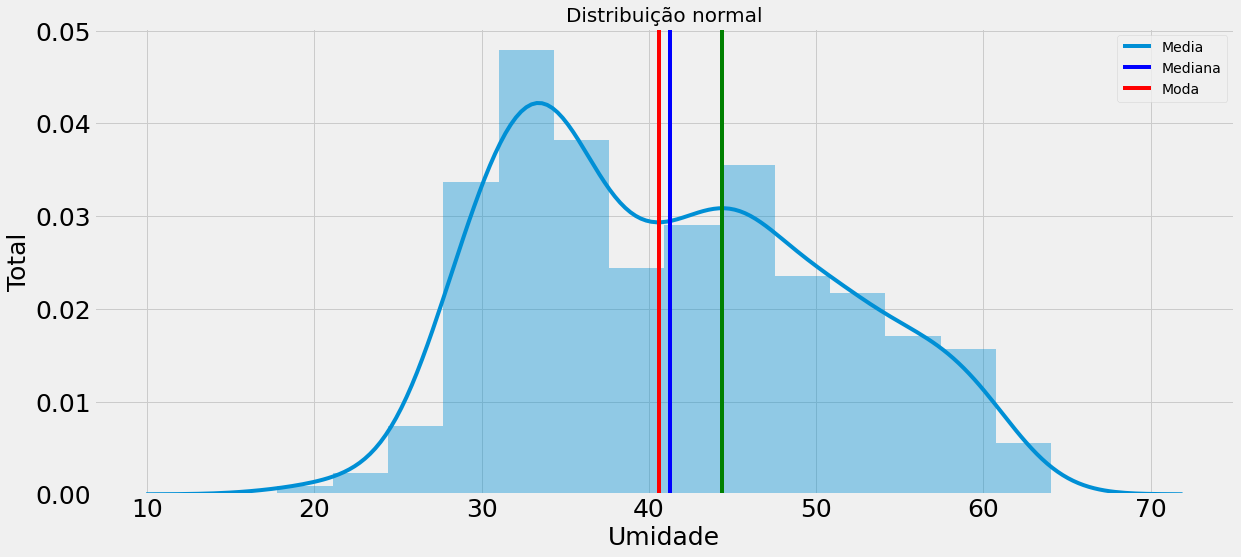

In [18]:
# Gráfico distribuição normal
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df['High']);
plt.title("Distribuição normal", fontsize=20)
plt.xlabel("Umidade")
plt.ylabel("Total")
plt.axvline(df['High'].mean(), color='b')
plt.axvline(df['High'].median(), color='r')
plt.axvline(df['High'].mode()[0], color='g');
plt.legend(["Media", "Mediana", "Moda"])
plt.show()

In [19]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997089  0.996928  0.993831   0.993831 -0.212415
High       0.997089  1.000000  0.996390  0.997367   0.997367 -0.183605
Low        0.996928  0.996390  1.000000  0.997078   0.997078 -0.229052
Close      0.993831  0.997367  0.997078  1.000000   1.000000 -0.204506
Adj Close  0.993831  0.997367  0.997078  1.000000   1.000000 -0.204506
Volume    -0.212415 -0.183605 -0.229052 -0.204506  -0.204506  1.000000

Text(0.5, 1.0, 'Matriz de correlação')

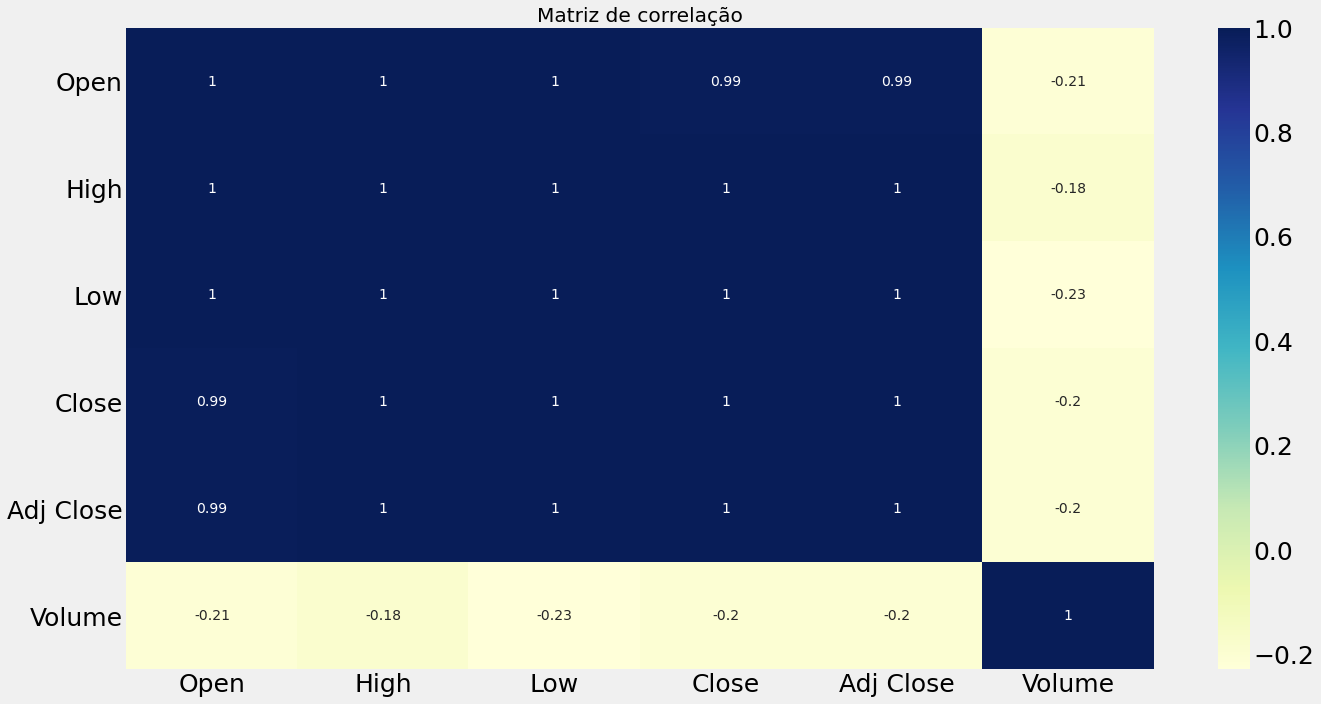

In [20]:
# Gráfico da matriz de correlação

plt.figure(figsize=(20.5,11))
ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

In [21]:
# Matriz de correlação interativa 
fig = px.imshow(df.iloc[:, 1:].corr())
fig.show()

# Análise dados

In [91]:
# Cálculo da média movel

media_alta = df[['Date', 'High']].groupby('Date').mean()
media_baixa = df[["Date", "Low"]].groupby('Date').mean()

print("Média movel ações alta", media_alta)
print()
print("Média movel ações baixa", media_baixa)

KeyError: "['Date'] not in index"

[Text(0.5, 1.0, 'Média móvel - ações baixa'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Wind speed')]

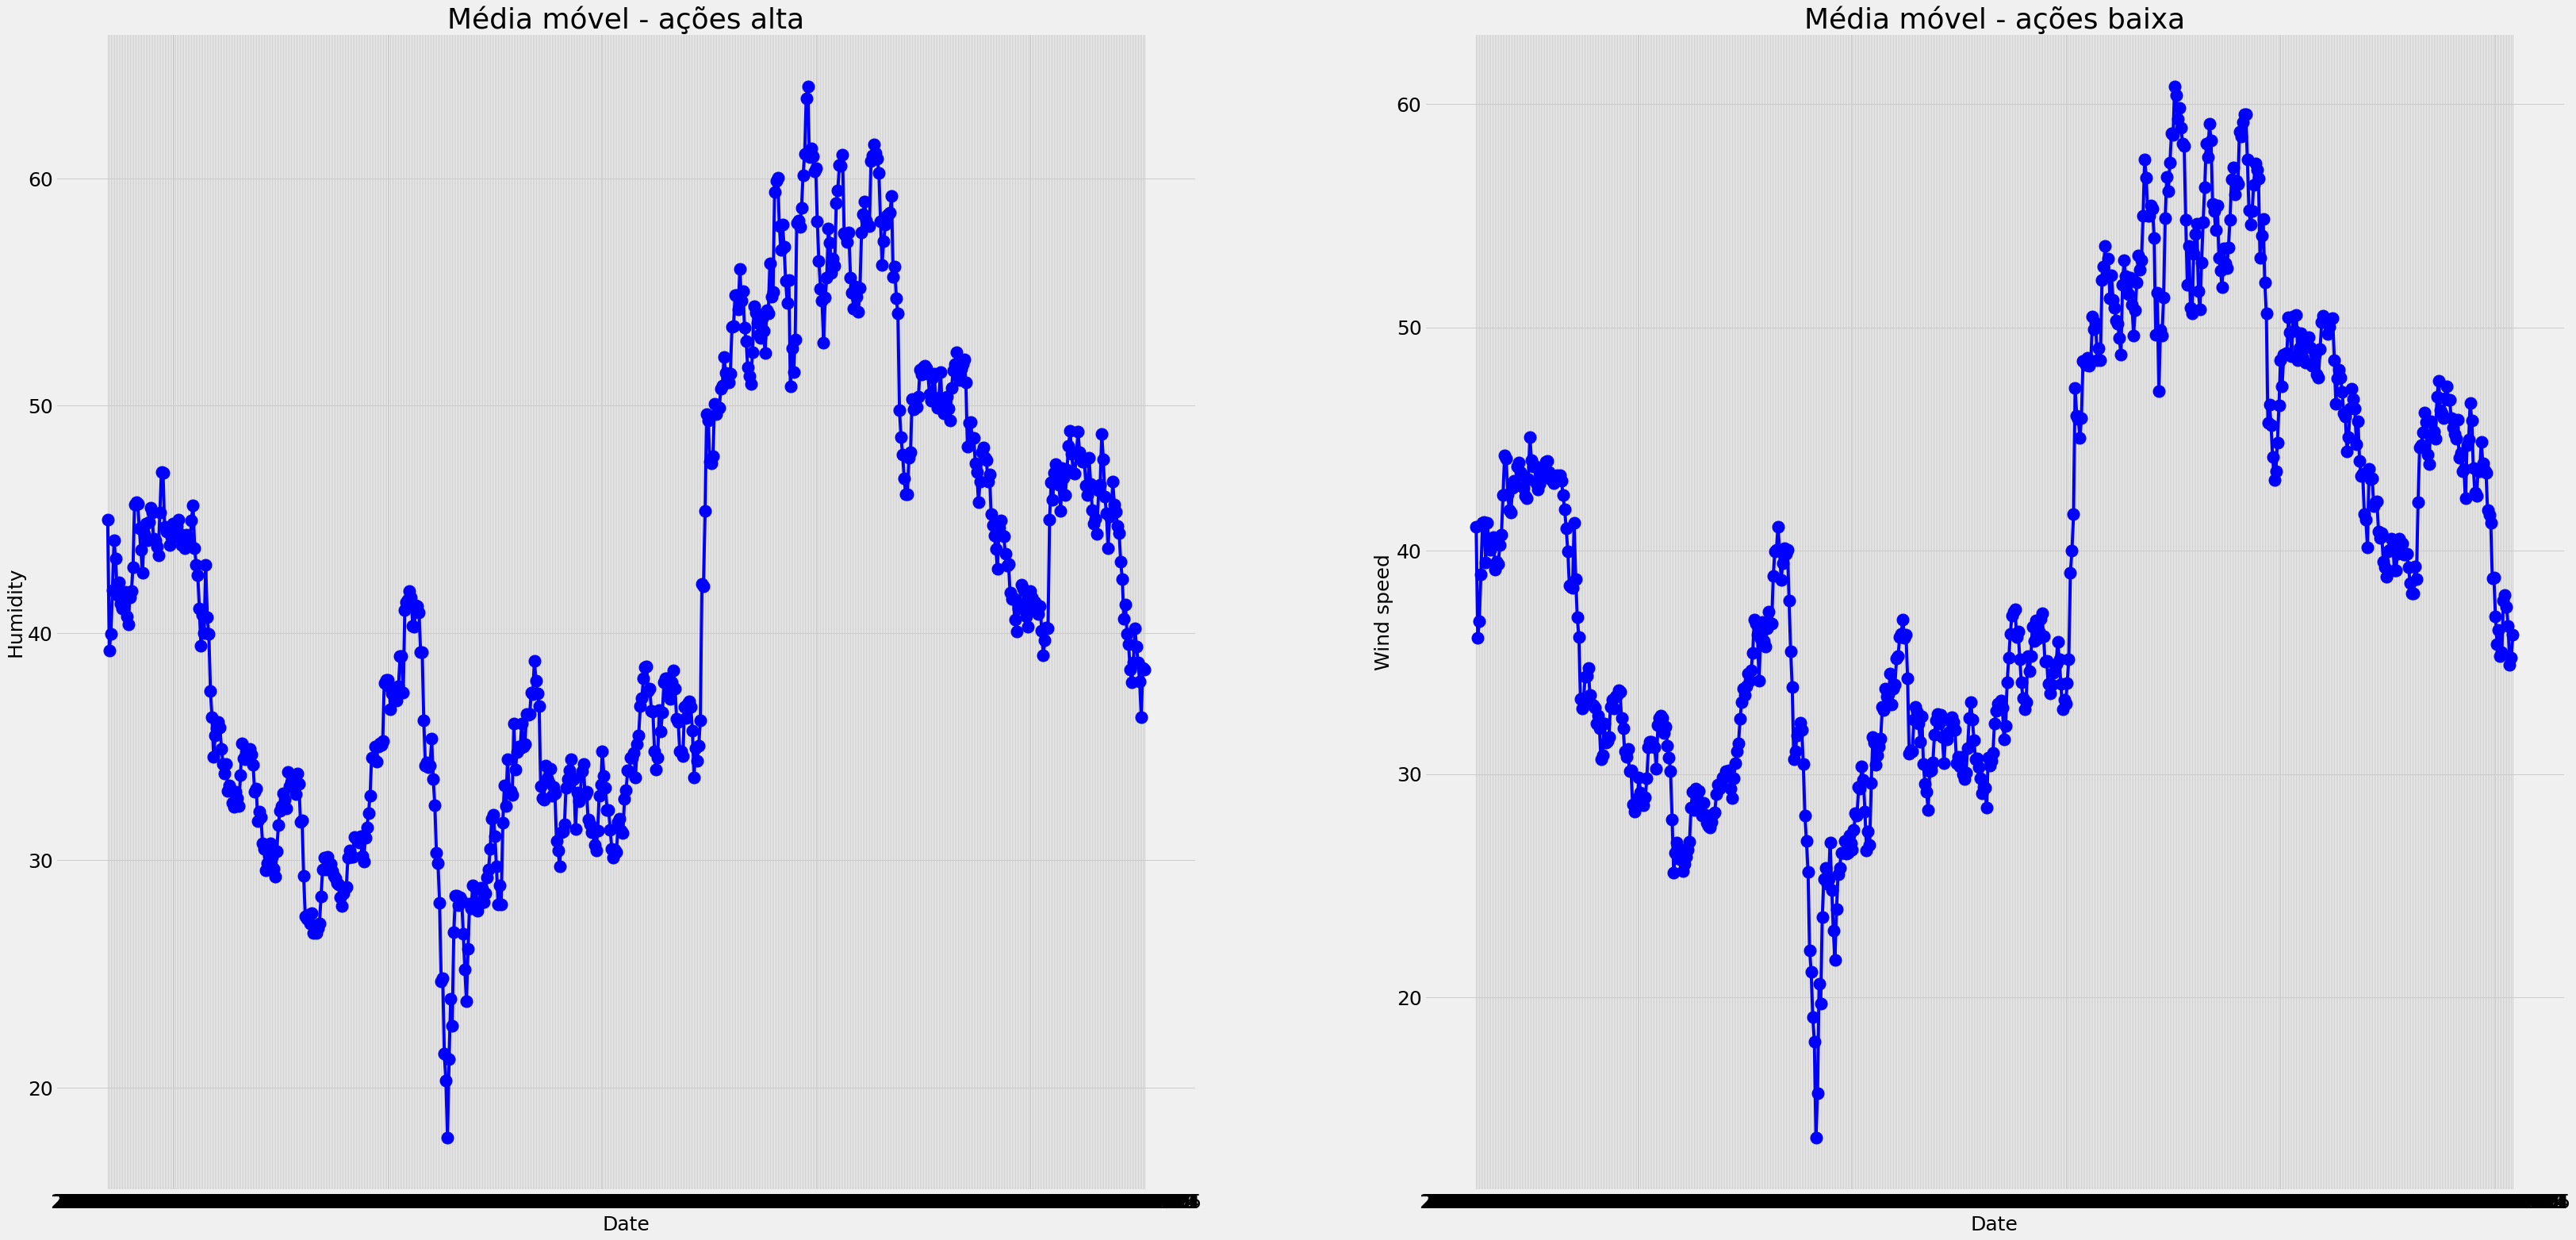

In [23]:
# Gráfico média movel - Humidity e Wind speed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50.5, 25));
plt.rcParams['font.size'] = '25'

ax1.plot(media_alta, marker='o', color = 'blue', markersize = 15);
ax1.set(title="Média móvel - ações alta", xlabel = "Date", ylabel = "Humidity")

ax2.plot(media_baixa, marker='o', color = 'blue', markersize = 15);
ax2.set(title="Média móvel - ações baixa", xlabel="Date", ylabel="Wind speed")

In [24]:
# Gráfico ações em alta

fig = px.line(df, x="Date", y="High", title="Ações em alta")
fig.show()

In [25]:
# Gráfico da ações em baixo

fig = px.line(df, x="Date", y="Low", title="Ações em baixo")
fig.show()

In [26]:
# Gráfico da ações em fechado

fig = px.line(df, x="Date", y="Close", title="Ações em fechado")
fig.show()

In [27]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [28]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])

fig.update_layout(
    title='Açãoes da Starlink',
    yaxis_title='Total',
    xaxis_title='Starlink Stock',
    xaxis_rangeslider_visible=False)
fig.show()

In [29]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'], high=df['High'],
    low=df['Low'], close=df['Close'],
    increasing_line_color= 'cyan', decreasing_line_color= 'gray'
)])

fig.update_layout(
    title='Açãoes da Starlink',
    yaxis_title='Total',
    xaxis_title='Starlink Stock',
    xaxis_rangeslider_visible=False)
fig.show()

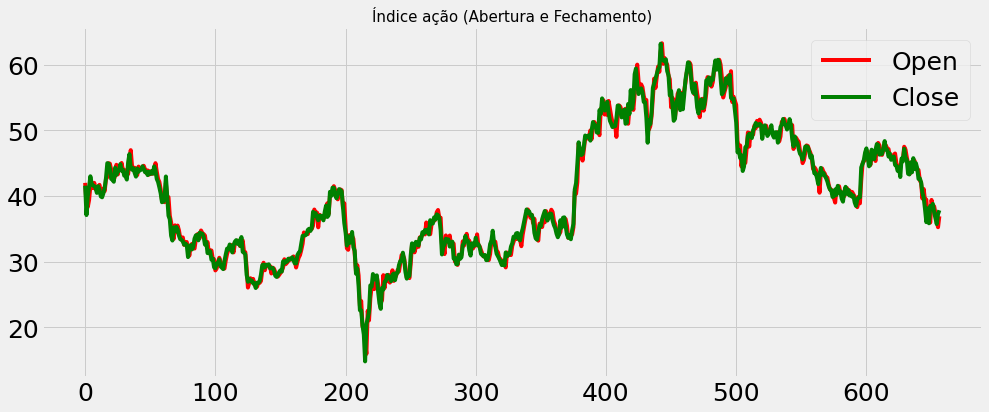

In [30]:
plt.figure(figsize=(15,6))
df['Open'].plot(color='r')
df['Close'].plot(color='g')
plt.xlabel('')
plt.title('Índice ação (Abertura e Fechamento)',size=15)
plt.legend()
plt.show()

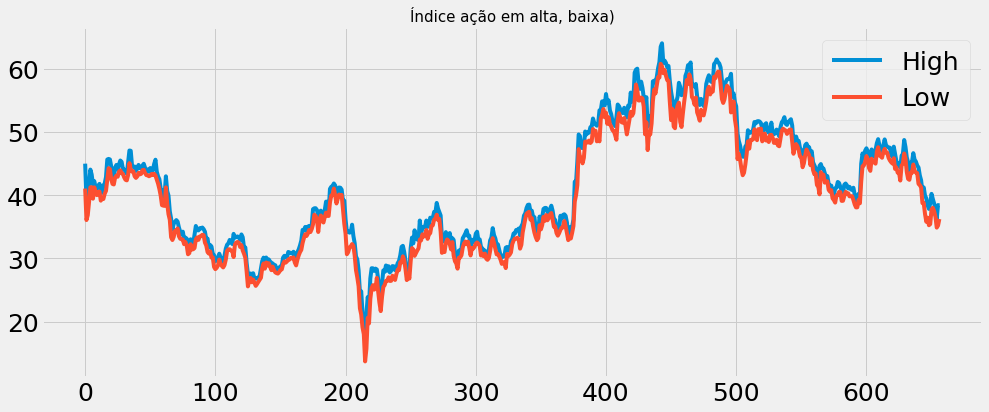

In [31]:
plt.figure(figsize=(15,6))
df['High'].plot()
df['Low'].plot()
plt.xlabel('')
plt.title('Índice ação em alta, baixa)',size=15)
plt.legend()
plt.show()

# Análise de dados = Univariada

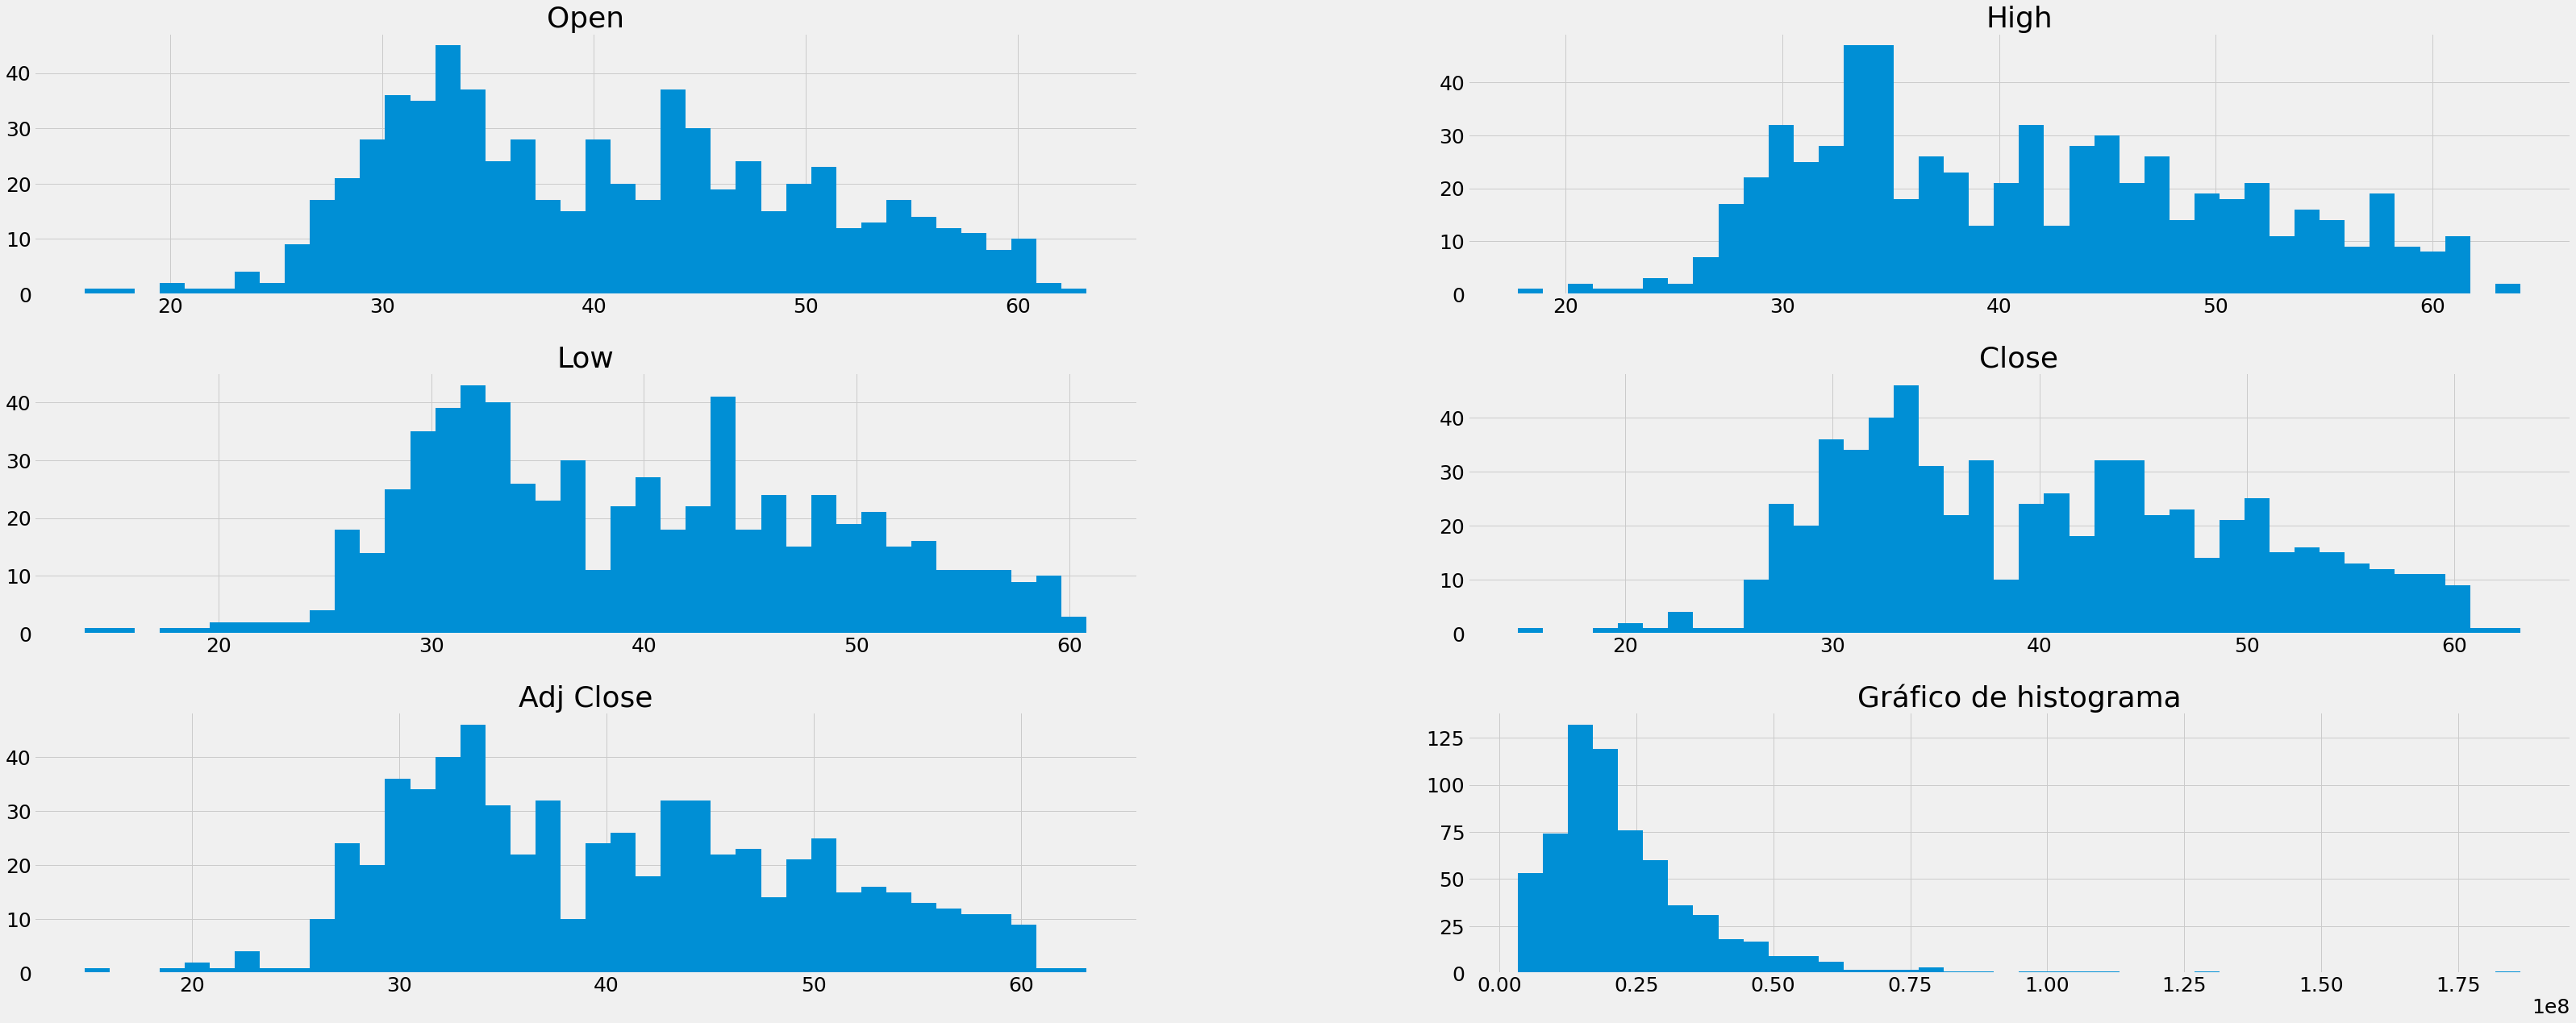

In [32]:
# Fazendo um comparativo dos dados 

df.hist(bins = 40, figsize=(50.2, 20))
plt.title("Gráfico de histograma")
plt.show()

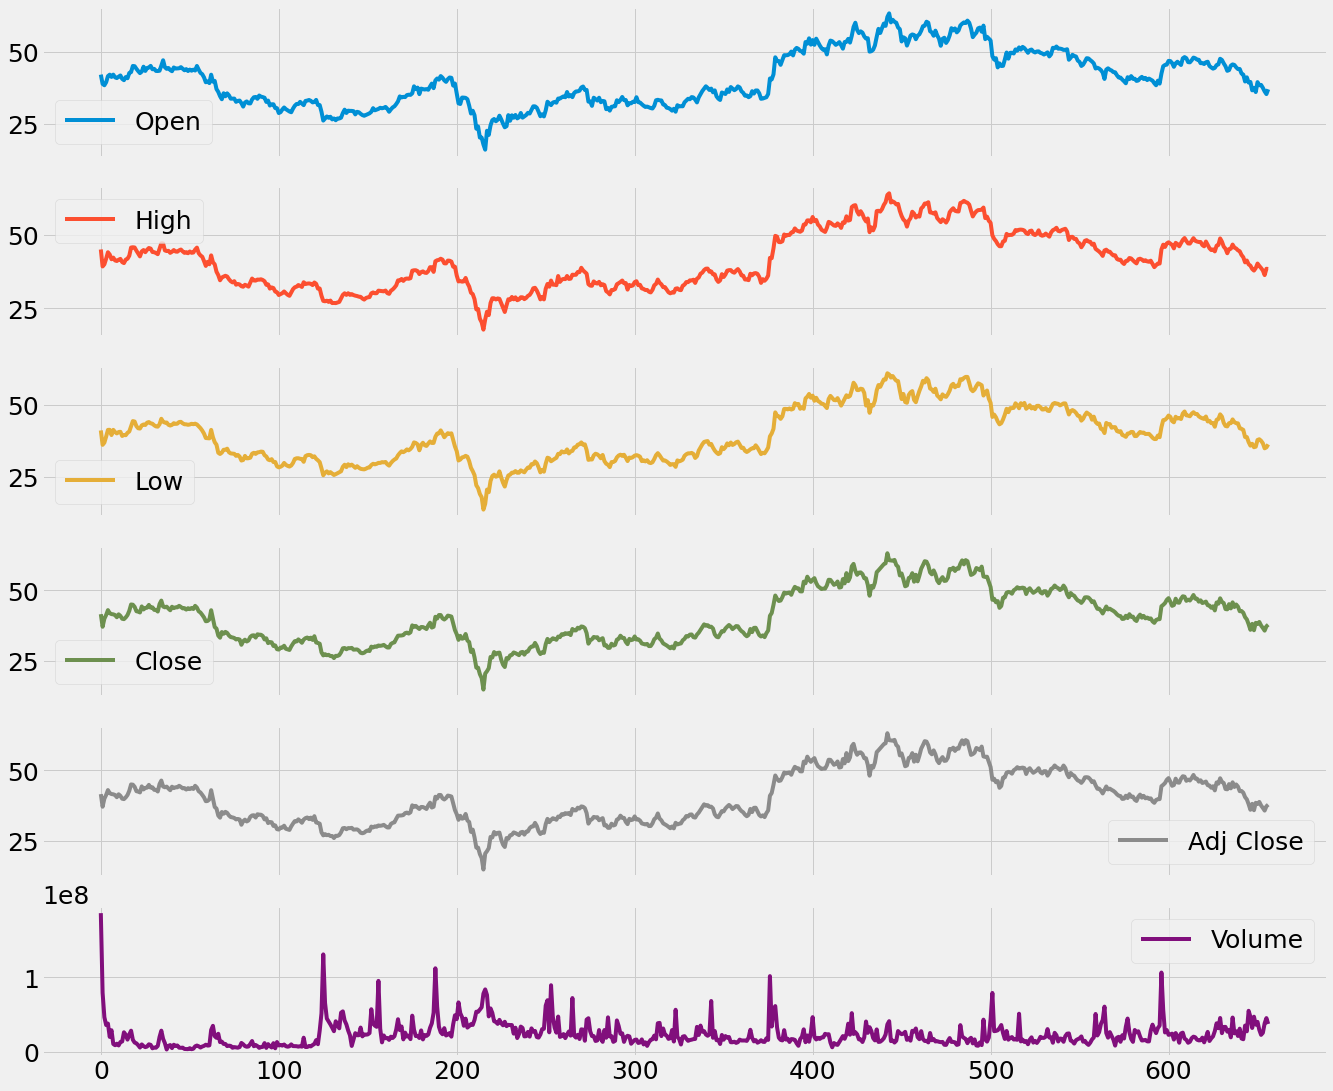

In [33]:
# Plot total
df.plot(subplots=True, figsize=(20.5, 18))
plt.show()

# Decomposição Sazonal

In [34]:
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')

df = pd.read_csv('UBER.csv',parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)
df

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-05-10  42.000000  45.000000  41.060001  41.570000  41.570000  186322500
2019-05-13  38.790001  39.240002  36.080002  37.099998  37.099998   79442400
2019-05-14  38.310001  39.959999  36.849998  39.959999  39.959999   46661100
2019-05-15  39.369999  41.880001  38.950001  41.290001  41.290001   36086100
2019-05-16  41.480000  44.060001  41.250000  43.000000  43.000000   38115500
...               ...        ...        ...        ...        ...        ...
2021-12-09  38.439999  38.700001  37.474998  37.540001  37.540001   22994800
2021-12-10  37.410000  37.869999  36.610001  36.669998  36.669998   25745800
2021-12-13  36.180000  36.307999  34.880001  35.730000  35.730000   38394700
2021-12-14  35.250000  38.450001  35.209999  37.259998  37.259998   45491700
2021-12-15  36.910000  38.375000  36.240002  37.830002  37.830002   37599600

[657 rows x 6 columns]

In [35]:
base = df["High"]
base

Date
2019-05-10    45.000000
2019-05-13    39.240002
2019-05-14    39.959999
2019-05-15    41.880001
2019-05-16    44.060001
                ...    
2021-12-09    38.700001
2021-12-10    37.869999
2021-12-13    36.307999
2021-12-14    38.450001
2021-12-15    38.375000
Name: High, Length: 657, dtype: float64

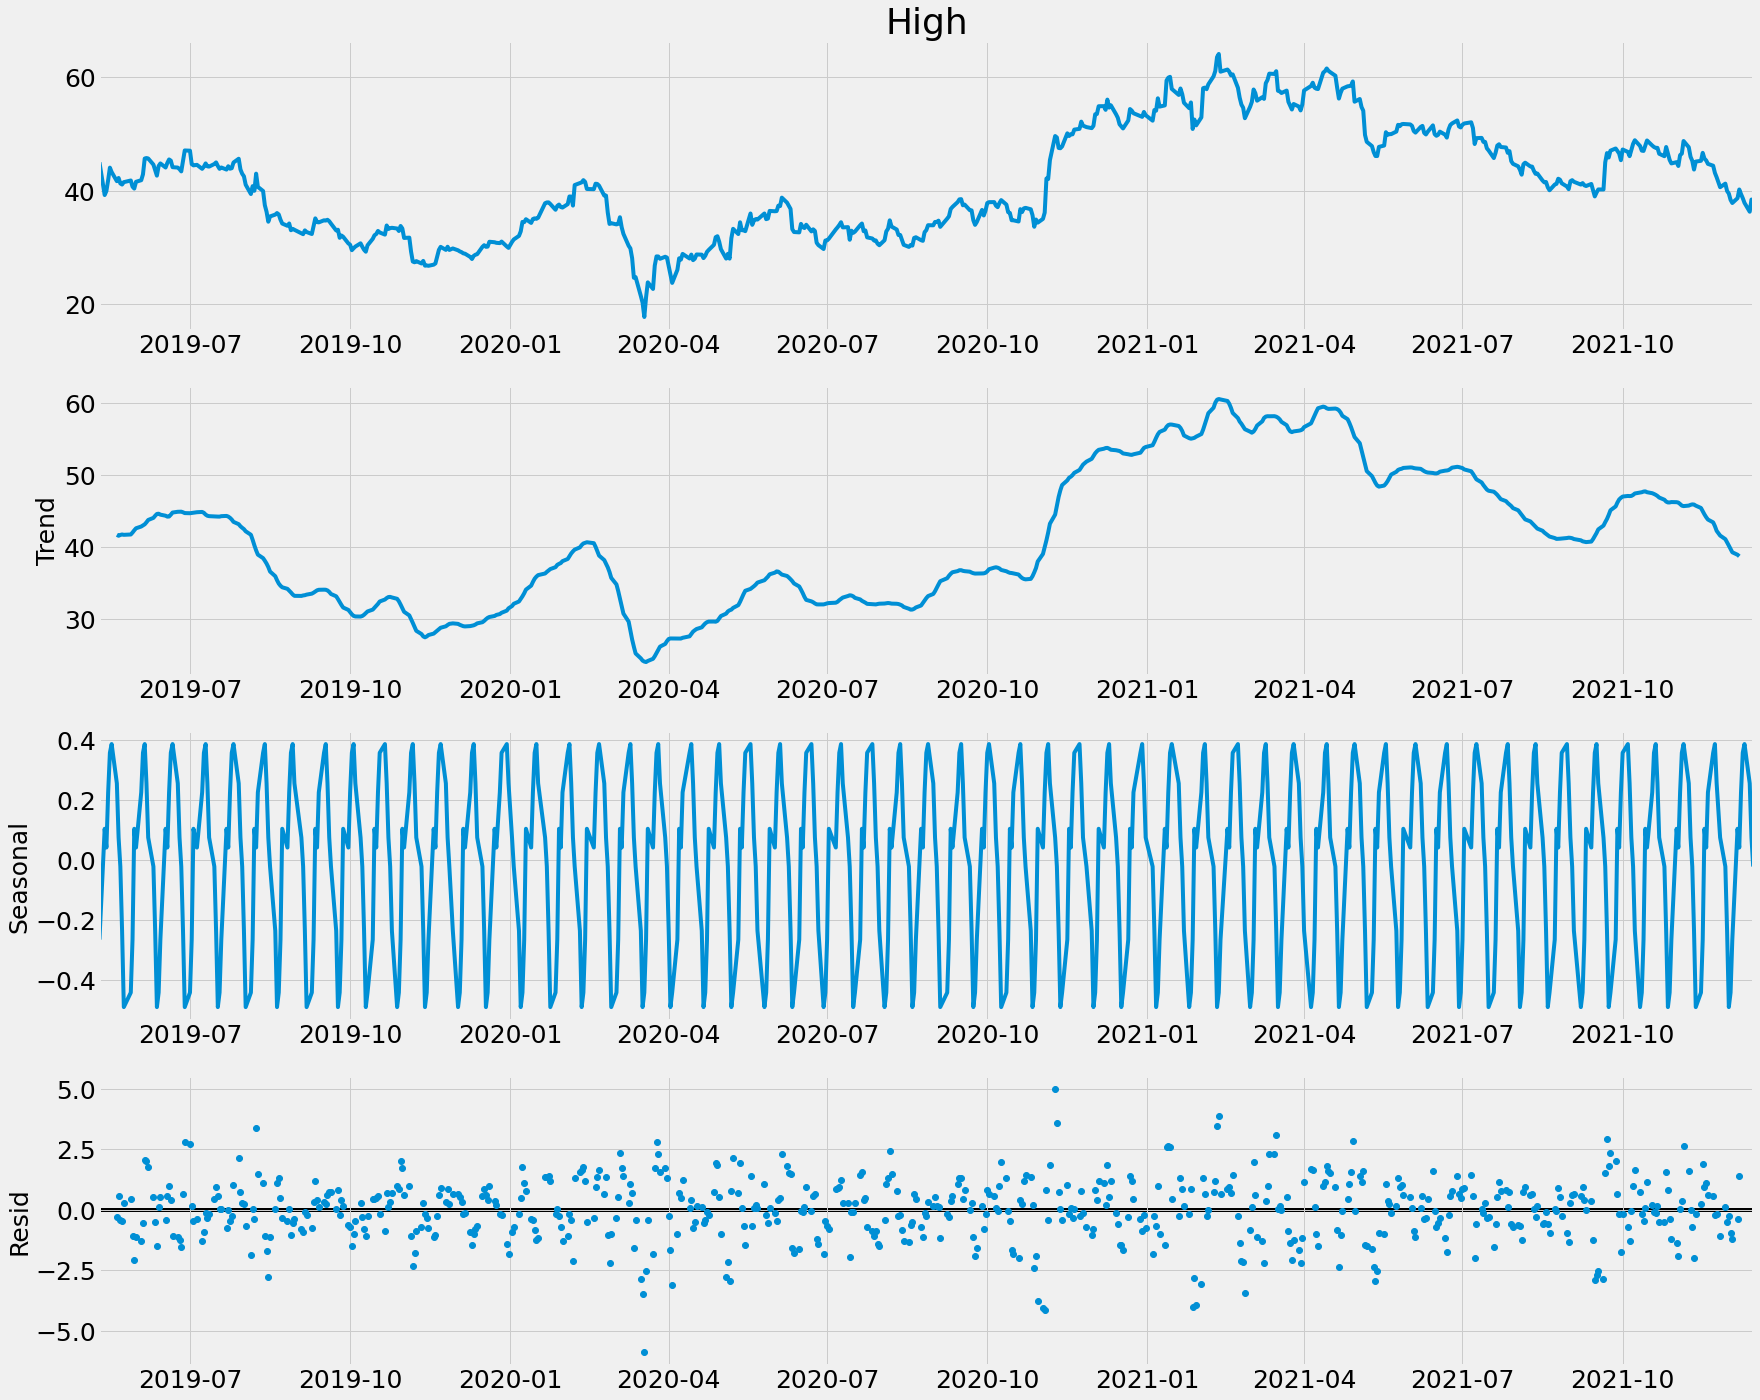

In [36]:
# Importação da biblioteca decomposição sazonal
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição aditiva
sd = seasonal_decompose(base, freq = 12)
sd.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

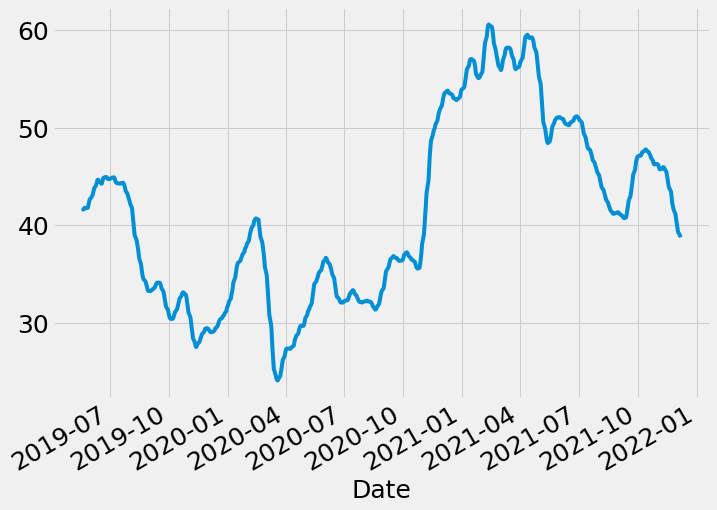

In [37]:
# Padrão de tendência extraído
dt = sd.trend

dt.plot(figsize=(10.5, 8))

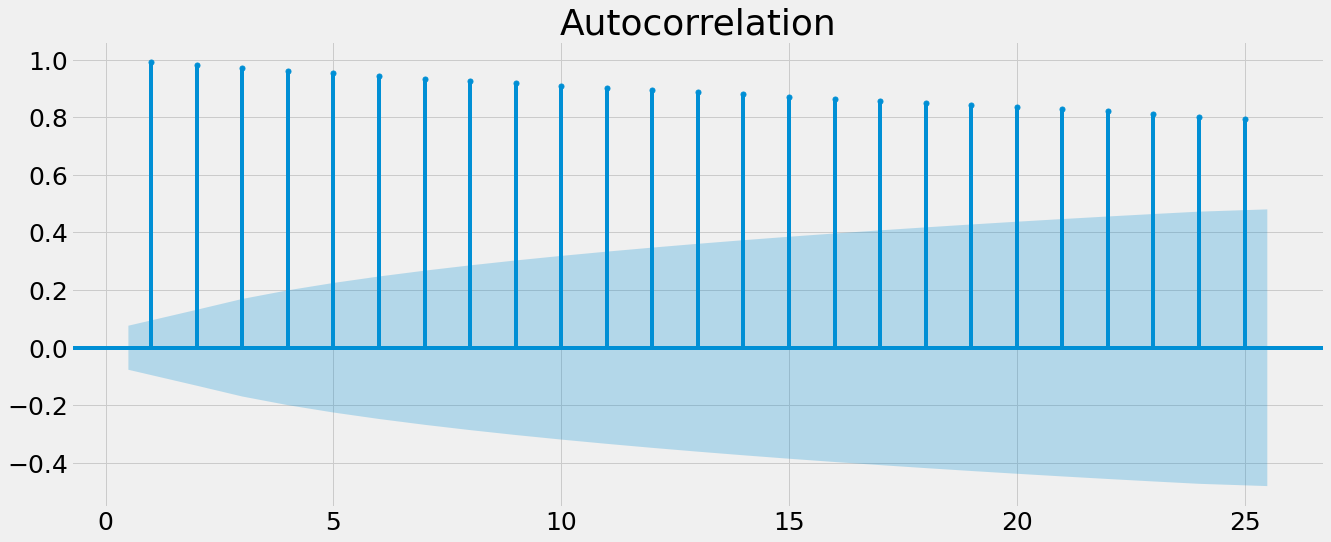

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(20,8))
plot_acf(base, lags=25, zero=False, ax=ax)
plt.show()

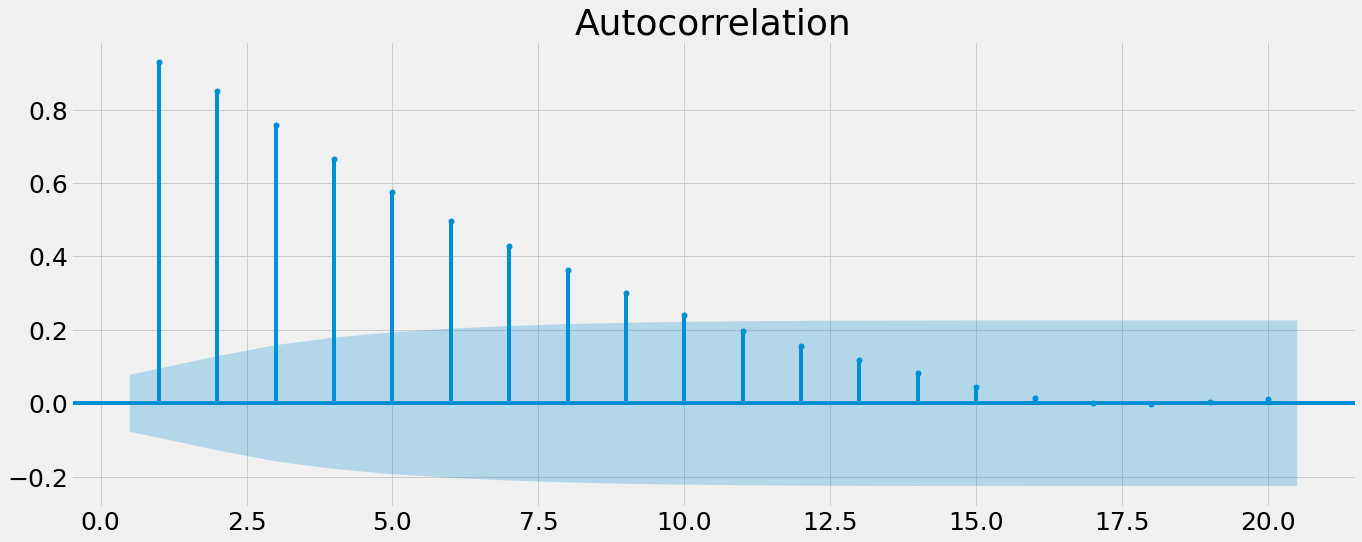

In [39]:
# Média movel
media_movel = base - base.rolling(20).mean()
media_movel = media_movel.dropna()

# Gráfico - Autocorrelation
fig, ax1 = plt.subplots(figsize=(20.5, 8))
plot_acf(media_movel, lags = 20, zero = False, ax = ax1)
plt.show()

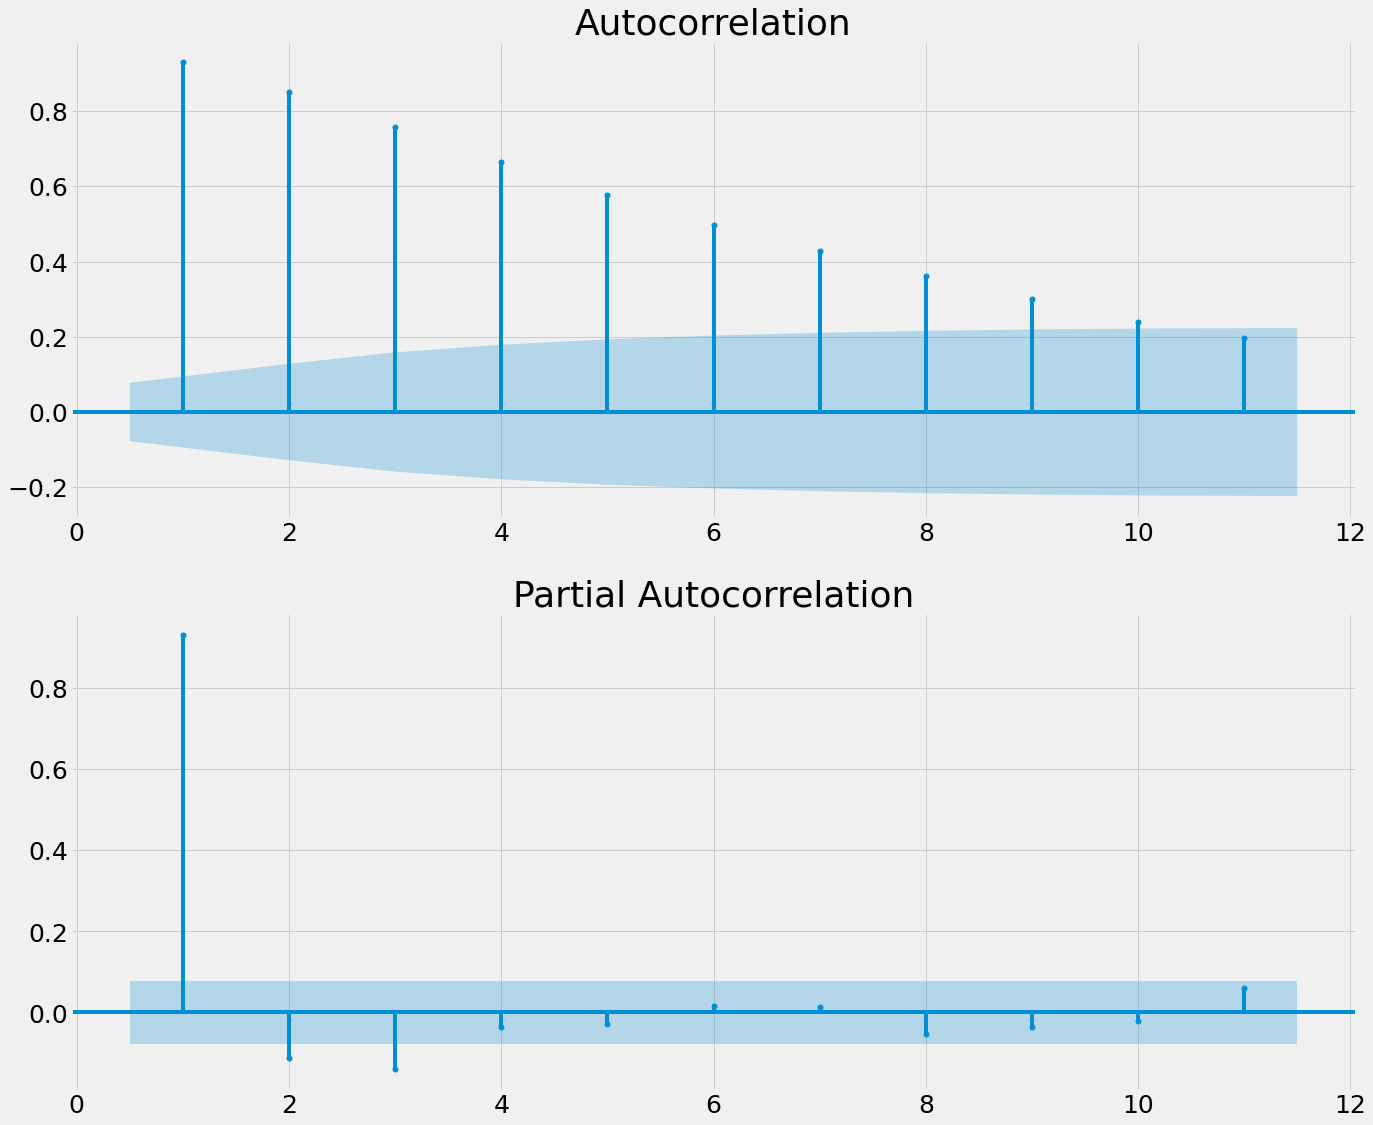

In [40]:
# SARIMA

# Gráfico 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20.5, 18))
plot_acf(media_movel, lags=11, zero=False, ax=ax1)

# Gráfico PACF
plot_pacf(media_movel, lags=11, zero=False, ax=ax2)
plt.show()

In [41]:
# ACF corta no lag 1. então, temos que usar o modelo MA.

media_movel = media_movel.diff(1).diff(12).dropna()
media_movel

Date
2019-06-26    0.534999
2019-06-27    2.814495
2019-06-28    2.639003
2019-07-01   -1.875997
2019-07-02   -2.863002
                ...   
2021-12-09   -0.146000
2021-12-10    0.495001
2021-12-13   -0.559900
2021-12-14    3.992902
2021-12-15   -0.468252
Name: High, Length: 625, dtype: float64

# Modelo ARIMA

**O ACF não sazonal não mostra nenhum dos padrões usuais dos modelos MA, AR ou ARMA, então não escolhemos nenhum deles. O Seaosnal ACF e PACF parecem um modelo MA(1). Selecionamos o modelo que combina ambos.**

- Modelo ARIMA 1

In [42]:
# Modelo ARIMA
from pmdarima.arima import auto_arima

modelo_arima_auto = auto_arima(base,easonal = True, 
                               m = 25, d = 0, D = 1, max_p = 2, max_q = 2,
                               trace = True, error_action ='ignore',
                               suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[25] intercept   : AIC=inf, Time=16.33 sec
 ARIMA(0,0,0)(0,1,0)[25] intercept   : AIC=4108.850, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[25] intercept   : AIC=2328.047, Time=3.11 sec
 ARIMA(0,0,1)(0,1,1)[25] intercept   : AIC=3447.125, Time=2.66 sec
 ARIMA(0,0,0)(0,1,0)[25]             : AIC=4106.888, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[25] intercept   : AIC=2496.044, Time=0.41 sec
 ARIMA(1,0,0)(2,1,0)[25] intercept   : AIC=2258.436, Time=9.60 sec
 ARIMA(1,0,0)(2,1,1)[25] intercept   : AIC=inf, Time=15.65 sec
 ARIMA(1,0,0)(1,1,1)[25] intercept   : AIC=inf, Time=5.29 sec
 ARIMA(0,0,0)(2,1,0)[25] intercept   : AIC=4103.509, Time=5.71 sec
 ARIMA(2,0,0)(2,1,0)[25] intercept   : AIC=2254.829, Time=10.44 sec
 ARIMA(2,0,0)(1,1,0)[25] intercept   : AIC=2323.036, Time=3.21 sec
 ARIMA(2,0,0)(2,1,1)[25] intercept   : AIC=inf, Time=17.80 sec
 ARIMA(2,0,0)(1,1,1)[25] intercept   : AIC=inf, Time=5.97 sec
 ARIMA(2,0,1)(2,1,0)[25] intercept   : A

- Modelo menor AIC e um pouco diferente anterior a componente sazonal Deltra e 1 ao invés 2

In [43]:
# Modelo - Auto ARIMA
modelo_arima_auto

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(2, 1, 0, 25),
      suppress_warnings=True, with_intercept=False)

In [44]:
# Modelo aic - Maior que anterior modelo
modelo_arima_auto.aic()

2251.743278033792

In [45]:
# Súmario do modelo
print(modelo_arima_auto.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  657
Model:             SARIMAX(1, 0, 2)x(2, 1, [], 25)   Log Likelihood               -1119.872
Date:                             Sun, 20 Mar 2022   AIC                           2251.743
Time:                                     17:49:50   BIC                           2278.437
Sample:                                          0   HQIC                          2262.110
                                             - 657                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9735      0.009    105.380      0.000       0.955       0.992
ma.L1          0.0901      

# Previsão do modelo

In [48]:
modelo_arima_pred = modelo_arima_auto.predict(n_periods = 200)
modelo_arima_pred

array([38.80496824, 39.33243951, 40.21159988, 39.95291707, 40.09726229,
       39.96350498, 40.16852993, 40.35369664, 40.19000857, 39.43771485,
       38.87561589, 38.64051298, 38.7900524 , 38.32314185, 40.43795211,
       40.34072698, 39.60868196, 40.18028286, 40.97455967, 40.42594739,
       40.76192794, 40.27076729, 41.22227559, 41.4891202 , 40.72837237,
       41.07008694, 41.1588064 , 42.20648387, 41.89273176, 42.19916895,
       41.86130316, 42.20381088, 42.42726982, 42.0253691 , 41.32766178,
       40.89211737, 40.2833689 , 40.24560448, 39.56398526, 40.70137478,
       39.96268887, 39.20113703, 39.5128244 , 40.40735901, 39.77289557,
       40.33383681, 40.02882515, 40.60355507, 41.07922592, 40.28176744,
       40.32847187, 40.05374315, 41.2034826 , 41.09345546, 41.74967286,
       41.28274218, 41.38895589, 41.3507145 , 41.08716793, 40.21070887,
       39.64855863, 38.80735155, 39.08597578, 38.29399355, 39.24846753,
       38.62658564, 37.96956702, 38.57475092, 39.67410045, 39.03

In [49]:
# Dataframe da previsão da ação

pred = pd.DataFrame(modelo_arima_pred, columns=["Previsão"])
pred

Previsão
0    38.804968
1    39.332440
2    40.211600
3    39.952917
4    40.097262
..         ...
195  39.384500
196  38.953622
197  39.311368
198  40.020138
199  39.375366

[200 rows x 1 columns]

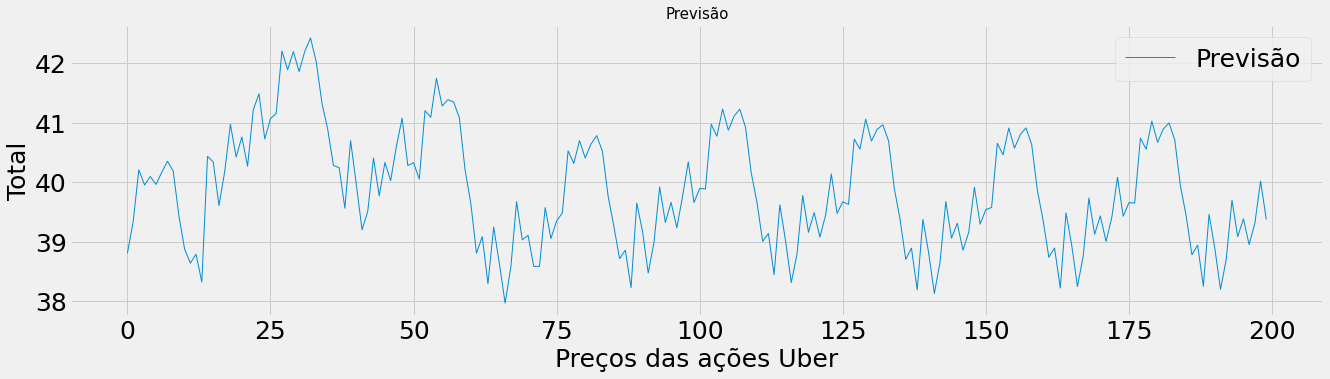

In [51]:
pd.concat([pred.Previsão],axis=1).plot(linewidth=1, figsize=(20,5))

plt.legend(["Previsão"])
plt.ylabel("Total")
plt.xlabel('Preços das ações Uber')
plt.title('Previsão',size=15)
plt.show();

# Modelo SARIMA

- SARIMA(2, 0, 2)x(2, 1, 0, 12) tem um desempenho melhor que outro modelo de ordens e tem baixo valor de AIC.
- Divida o conjunto de trem e o conjunto de teste do conjunto de dados de trem e ajuste nosso modelo.

**Modelo SARIMAX**

- Prob(Q) é >0,05, então não rejeitamos a hipótese nula de que os resíduos não são correlacionados. Prob(JB) >0,05, então não rejeitamos a hipótese nula de que os resíduos não são normalmente distribuídos Assim, com base no resumo dado, os Resíduos não são correlacionados e normalmente distribuídos

In [52]:
# Modelo SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajuste o modelo SARIMAX ao conjunto de treino
modelo_sarimax = SARIMAX(base, order = (2,0, 2), seasonal_order = (2, 1, 0, 12))

# Treinamento do modelo SARIMA
modelo_sarimax_fit = modelo_sarimax.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [53]:
# Summary dos dados
print(modelo_sarimax_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                High   No. Observations:                  657
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood               -1121.162
Date:                             Sun, 20 Mar 2022   AIC                           2256.325
Time:                                     17:51:35   BIC                           2287.610
Sample:                                          0   HQIC                          2268.464
                                             - 657                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3374      0.282      4.750      0.000       0.786       1.889
ar.L2         -0.3734      

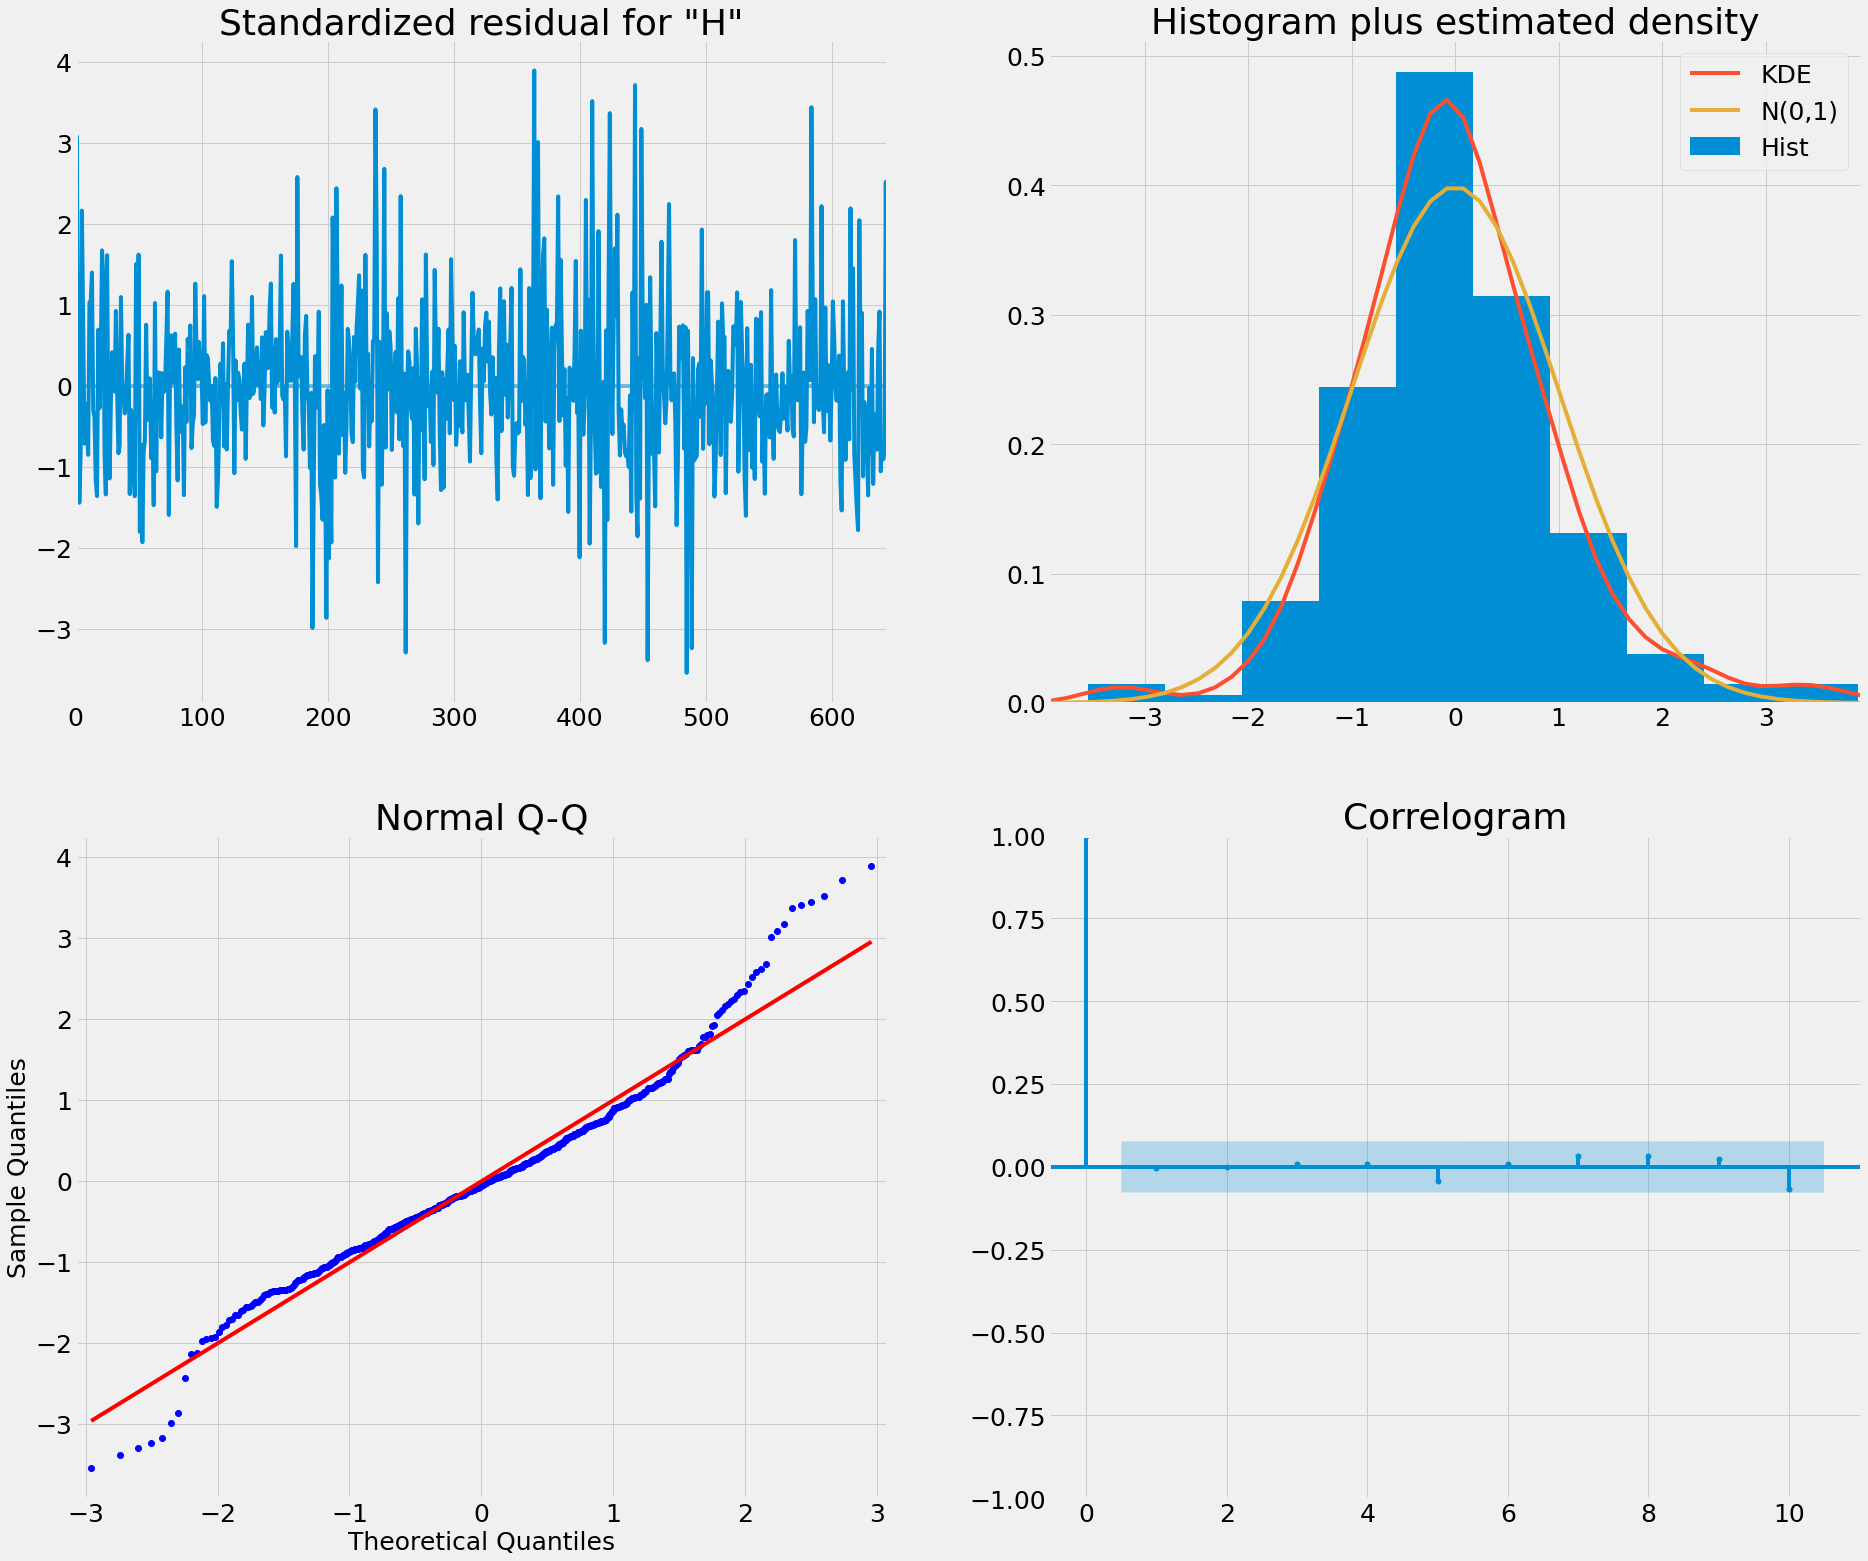

In [54]:
# 4 gráfico diagnóstico do modelo SARIMA

modelo_sarimax_fit.plot_diagnostics(figsize=(28.5, 25))
plt.show()

**Standardized residul**

- O gráfico de resíduos padronizado informa que não há padrões óbvios nos resíduos A curva KDE é muito semelhante à distribuição normal. A maioria dos Datapoints está na linha reta. Além disso, correlações de 95% para atraso maior que um não são significativas Nosso modelo segue um comportamento padronizado. se não, temos que melhorar nosso modelo Prever os valores para o conjunto de teste

In [56]:
# Prever os valores para o conjunto de teste

x_1 = len(base)
y_2 = len(base) + len(base) - 1

# Previsão do modelo sarimax
pred = modelo_sarimax_fit.predict(start = x_1, end = y_2)
pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



657     38.500969
658     38.818821
659     38.412878
660     38.747928
661     39.047872
          ...    
1309    38.163244
1310    38.972139
1311    38.871083
1312    38.642929
1313    38.340501
Name: predicted_mean, Length: 657, dtype: float64

In [57]:
# Previsão 

pred = modelo_sarimax_fit.predict(n_periods = 150)
pred = pd.DataFrame(pred)
pred

predicted_mean
Date                      
2019-05-10        0.000000
2019-05-13        0.000879
2019-05-14        0.001565
2019-05-15        0.002182
2019-05-16        0.002748
...                    ...
2021-12-09       39.681510
2021-12-10       39.112143
2021-12-13       37.413716
2021-12-14       35.006873
2021-12-15       38.861718

[657 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

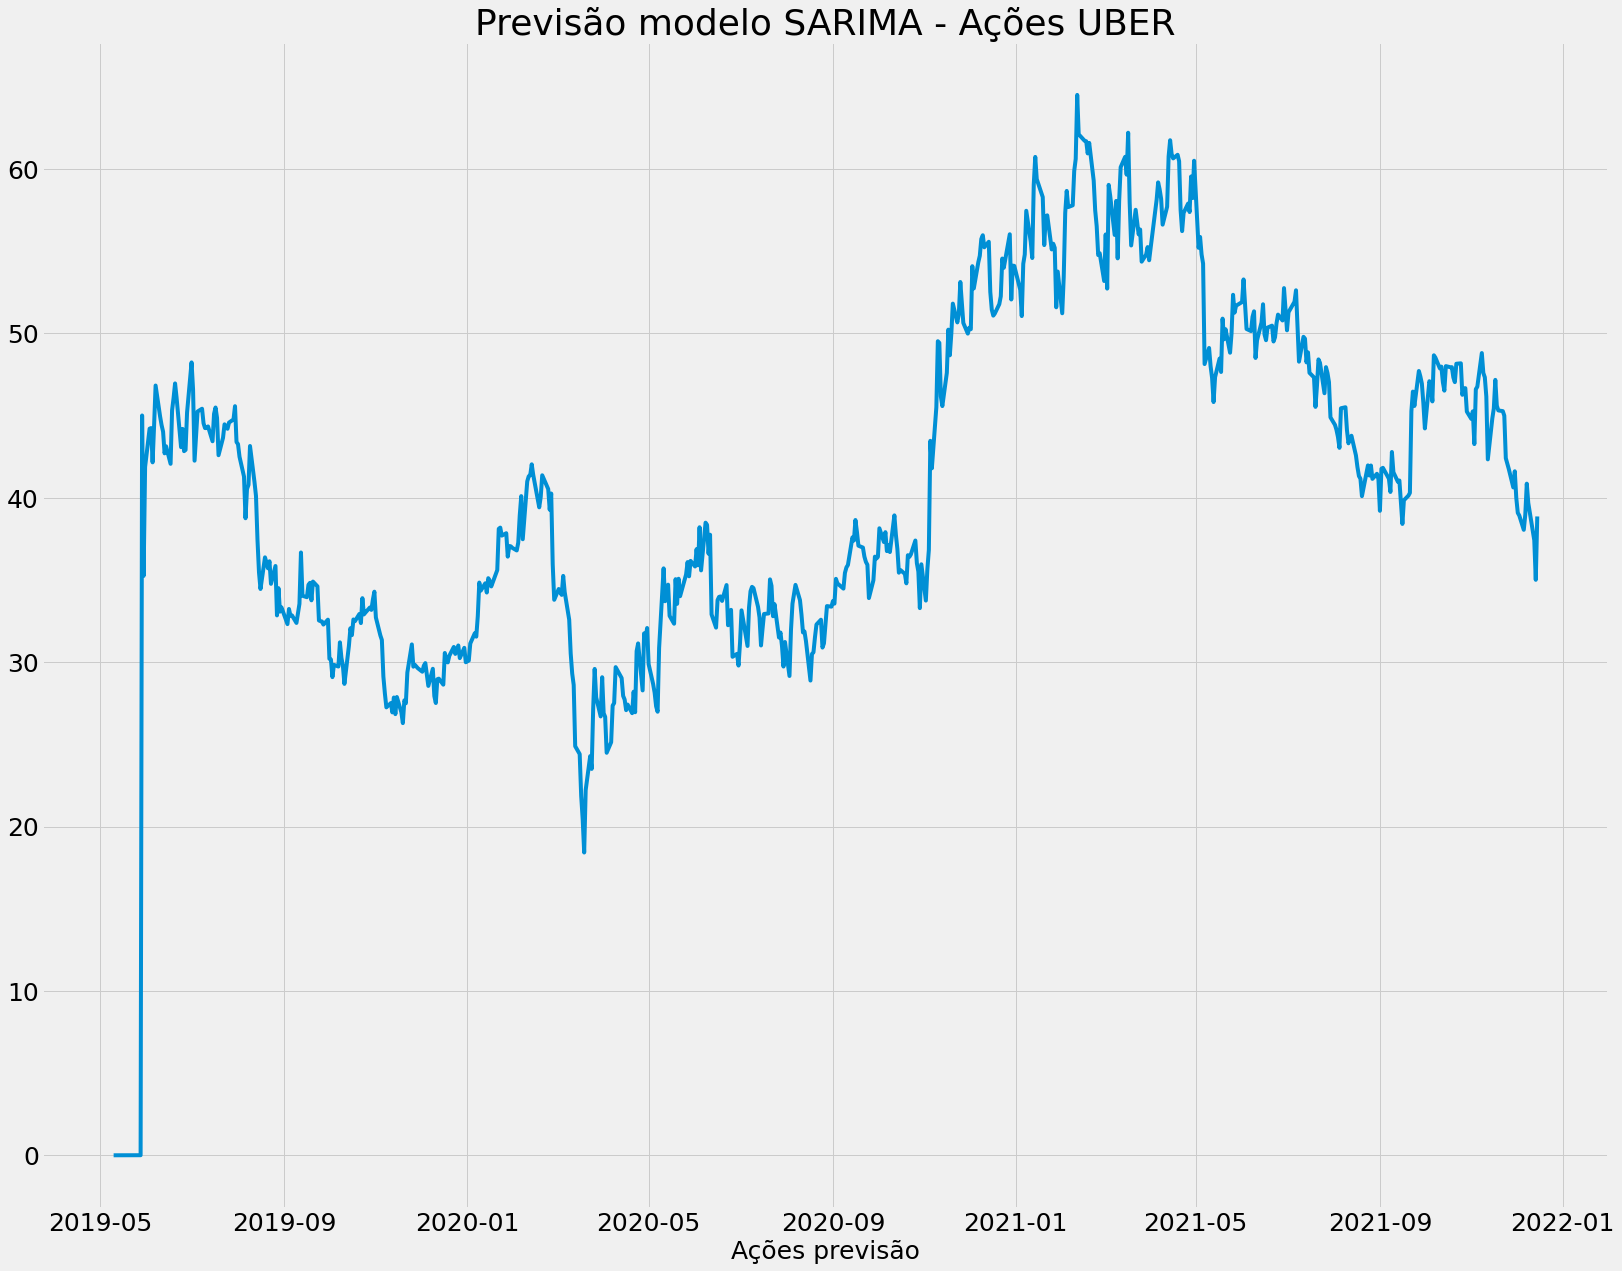

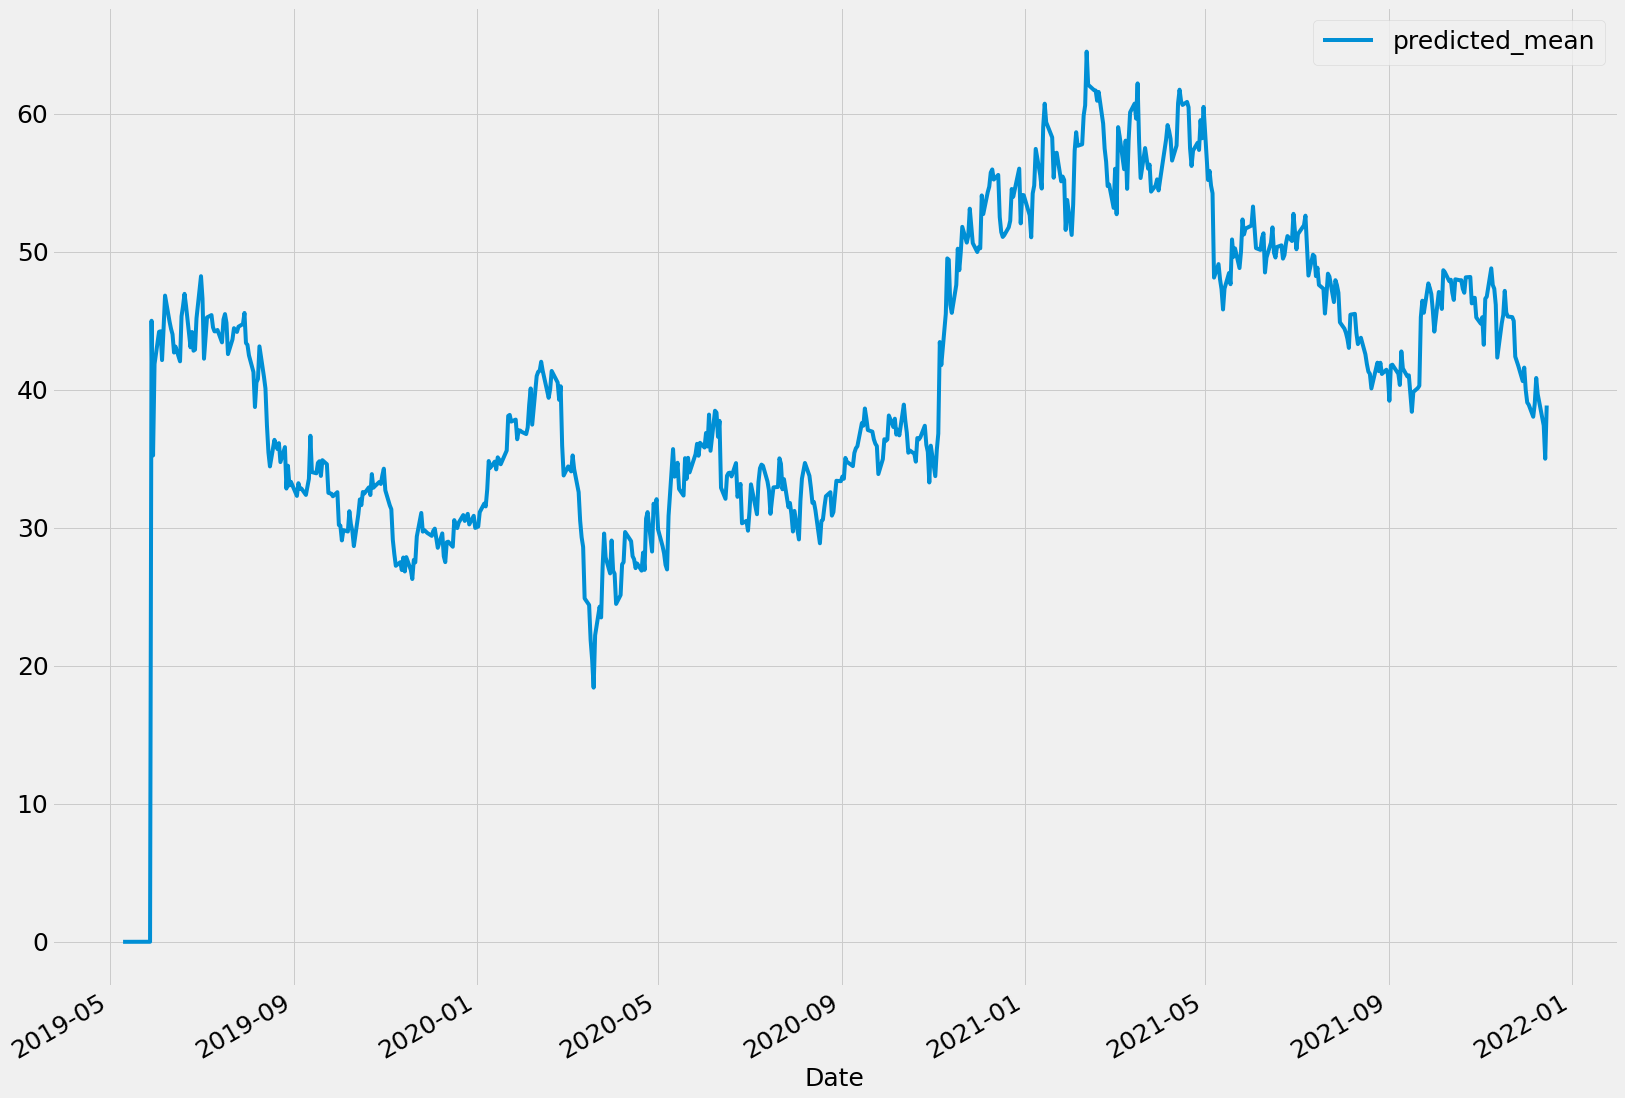

In [59]:
plt.plot(pred["predicted_mean"])
plt.title("Previsão modelo SARIMA - Ações UBER")
plt.xlabel("Ações previsão")
pred.plot(label='Previsão')

# Métricas para o modelo

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [60]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(base, pred))
mae = mean_absolute_error(base, pred)
mape = mean_absolute_percentage_error(base, pred)
mse = mean_squared_error(base, pred)
r2 = r2_score(base, pred)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

Resultado
RMSE   5.833291
MAE    1.768986
MSE   34.027279
MAPE   0.043461
R²     0.628231

# Modelo 2 SARIMA Previsão

In [66]:
data_test_md = df['Close'].resample('MS').mean().dropna()
data_test_md

Date
2019-05-01    40.816666
2019-06-01    43.670000
2019-07-01    43.698637
2019-08-01    36.139546
2019-09-01    32.592000
2019-10-01    31.252174
2019-11-01    28.185500
2019-12-01    29.342857
2020-01-01    34.979524
2020-02-01    38.461579
2020-03-01    26.130455
2020-04-01    27.579048
2020-05-01    32.412000
2020-06-01    33.459091
2020-07-01    31.935000
2020-08-01    31.687143
2020-09-01    35.456667
2020-10-01    35.659546
2020-11-01    46.560000
2020-12-01    52.383636
2021-01-01    54.295263
2021-02-01    57.543684
2021-03-01    55.610435
2021-04-01    57.717619
2021-05-01    48.893000
2021-06-01    50.025909
2021-07-01    47.428571
2021-08-01    41.644091
2021-09-01    42.100476
2021-10-01    46.340000
2021-11-01    43.661905
2021-12-01    37.309091
Freq: MS, Name: Close, dtype: float64

In [61]:
# Modelo SARIMAX dados test

modelo_sarima_2 = SARIMAX(base, order=(2,0,2), seasonal_order=(2,1,0,12))
modelo_sarima_2_fit = modelo_sarima_2.fit()
print(modelo_sarima_2_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                      SARIMAX Results                                      
Dep. Variable:                                High   No. Observations:                  657
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood               -1121.162
Date:                             Sun, 20 Mar 2022   AIC                           2256.325
Time:                                     17:55:19   BIC                           2287.610
Sample:                                          0   HQIC                          2268.464
                                             - 657                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3374      0.282      4.750      0.000       0.786       1.889
ar.L2         -0.3734      

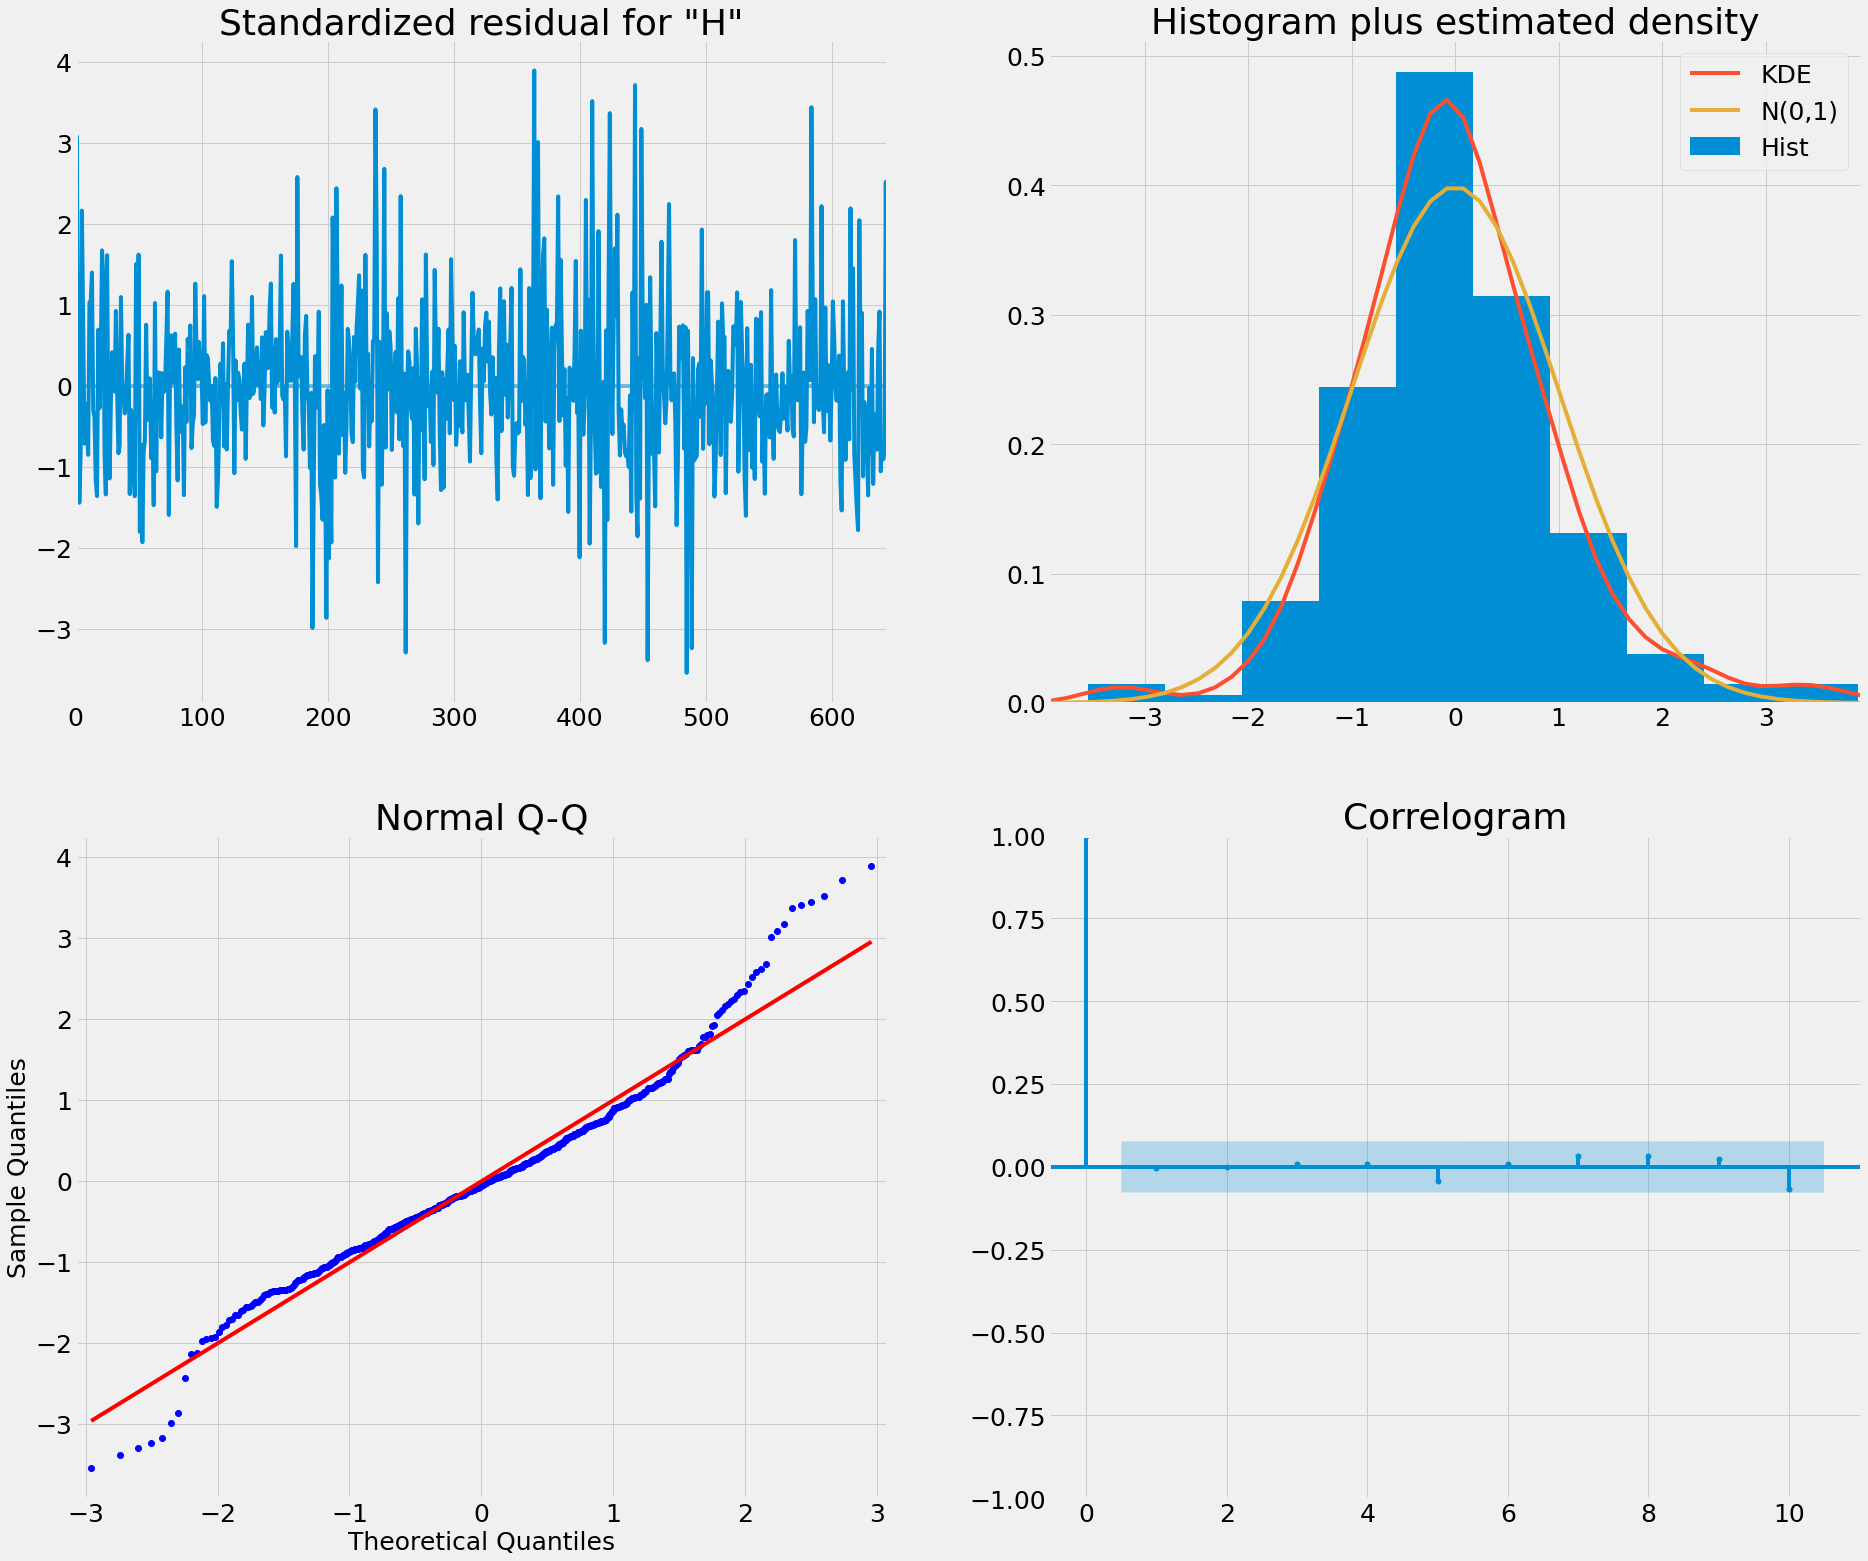

In [62]:
# 4 gráfico diagnóstico do modelo SARIMA

modelo_sarima_2_fit.plot_diagnostics(figsize=(28.5, 25))
plt.show()

In [67]:
# Exibindo os ultimos dados 
data_test_md.tail()

Date
2021-08-01    41.644091
2021-09-01    42.100476
2021-10-01    46.340000
2021-11-01    43.661905
2021-12-01    37.309091
Freq: MS, Name: Close, dtype: float64

In [68]:
# Index dos dados
data_test_md.index[0]

Timestamp('2019-05-01 00:00:00', freq='MS')

In [72]:
# Create SARIMA mean forecast
sarima_forecast = modelo_sarima_2_fit.get_forecast(steps=20).predicted_mean
sarima_forecast

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



657    38.500969
658    38.818821
659    38.412878
660    38.747928
661    39.047872
662    39.536110
663    39.839089
664    39.757804
665    39.906346
666    38.923434
667    38.806465
668    38.919022
669    38.224756
670    38.766188
671    38.428070
672    38.922443
673    39.114643
674    39.805754
675    39.572547
676    39.310641
Name: predicted_mean, dtype: float64

<AxesSubplot:>

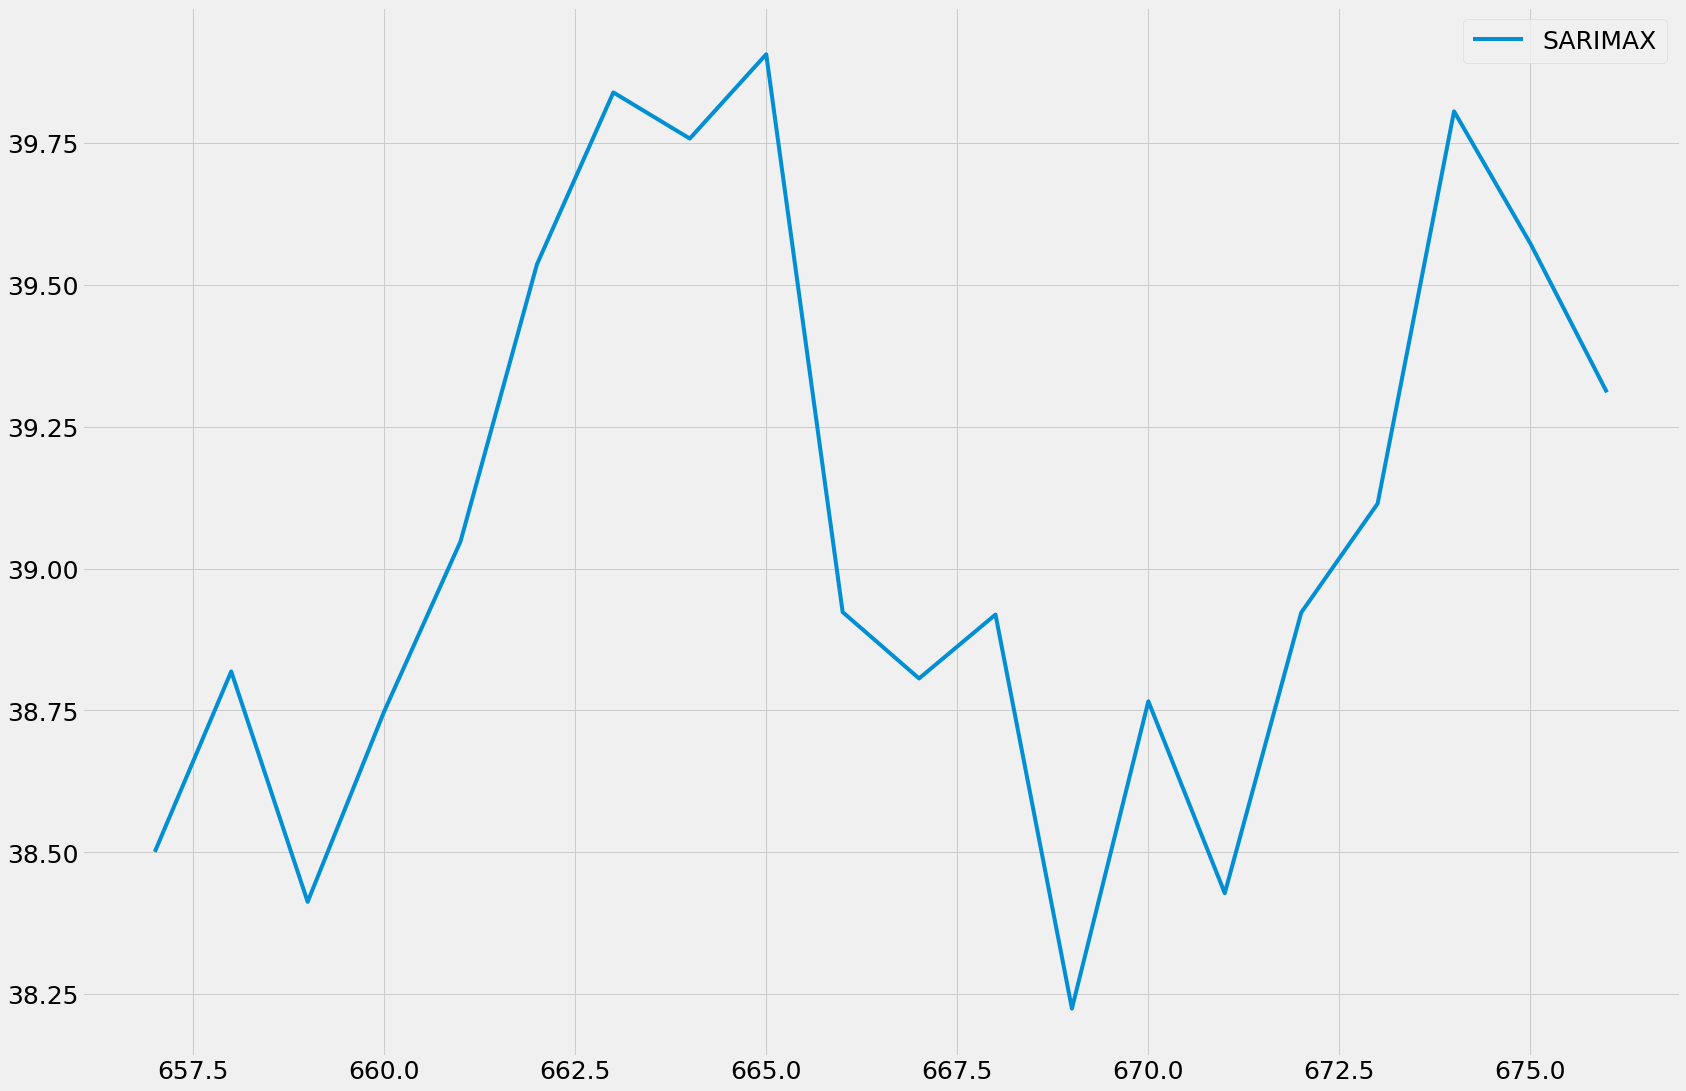

In [79]:
sarima_forecast.plot(label='SARIMAX',figsize=(25.5, 18), legend=True)

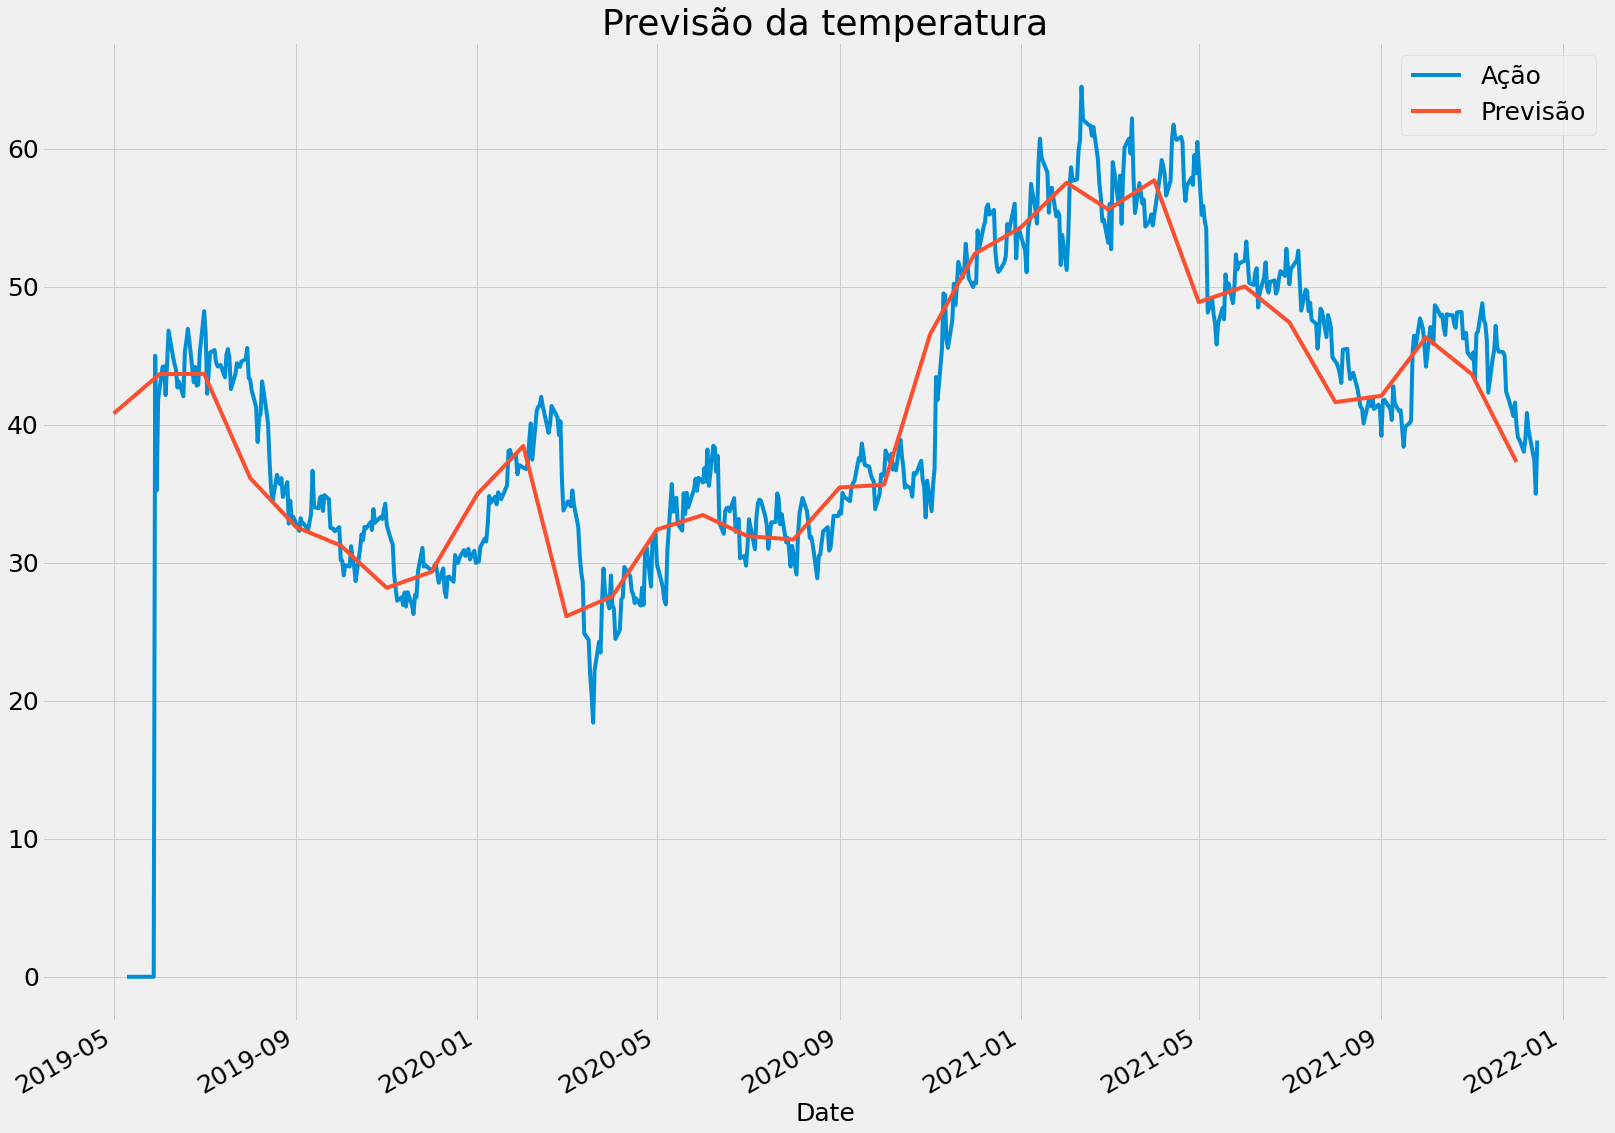

In [82]:
plt.plot(pred["predicted_mean"])
data_test_md.plot()
plt.title("Previsão da temperatura")
plt.legend(["Ação", "Previsão"])
plt.show()

# Métricas do modelo 02 - Dados de test

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [88]:
rmse = np.sqrt(mean_squared_error(base, pred))
mae = mean_absolute_error(base, pred)
mape = mean_absolute_percentage_error(base, pred)
mse = mean_squared_error(base, pred)
r2 = r2_score(base, pred)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

Resultado
RMSE   5.833291
MAE    1.768986
MSE   34.027279
MAPE   0.043461
R²     0.628231

# Salvando modelo time series

In [90]:
# Salvando modelo

import pickle

with open('pred.pkl', 'wb') as file:
    pickle.dump(pred, file)